# How do you achieve the following using clustering techniques?

### Netflix wants to identify similar movies based on movie characteristics.

## Load the Dataset

For my dataset, I chose the IMDB 5000 movie dataset. This dataset contains data about film color, director name and popularity, critic reviews, duration, cast name and popularity, box office gross, film budget, film rating, critic scores, and more.

In [1]:
cd /Users/rodrickleary/Downloads

/Users/rodrickleary/Downloads


In [2]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings




warnings.filterwarnings(action="ignore")

In [3]:
df = pd.read_csv('movie_metadata.csv')

In [4]:
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-

In [6]:
for column_name in df.columns:
    print("Unique values in column {} are: {}".format(column_name, df[column_name].unique()))

Unique values in column color are: ['Color' nan ' Black and White']
Unique values in column director_name are: ['James Cameron' 'Gore Verbinski' 'Sam Mendes' ... 'Scott Smith'
 'Benjamin Roberds' 'Daniel Hsia']
Unique values in column num_critic_for_reviews are: [723. 302. 602. 813.  nan 462. 392. 324. 635. 375. 673. 434. 403. 313.
 450. 733. 258. 703. 448. 451. 422. 599. 343. 509. 251. 446. 315. 516.
 377. 644. 750. 300. 608. 334. 376. 366. 378. 525. 495. 469. 304. 436.
 453. 424. 654. 539. 590. 338. 490. 306. 575. 428. 470. 298. 488. 322.
 421. 162. 367. 240. 384. 248. 284. 396. 645. 408. 219. 486. 682.  85.
 264. 418. 186. 585.  91. 250. 536. 370. 416. 401. 521.  10. 218. 576.
 226. 443. 188. 286. 288. 280. 653. 712. 642.   1. 187. 362. 500. 389.
 235. 231. 227. 275. 474. 228. 191. 329. 295. 318. 323. 276. 478. 167.
 185. 350. 245. 406. 739. 225. 145. 310. 526. 465. 357. 194. 339. 132.
 135. 256. 196. 220. 211. 464. 208. 287. 210. 432. 190. 314. 518. 291.
 292. 184. 141. 267. 351. 1

## Exploratory Data Analysis

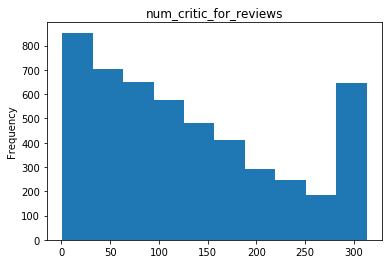

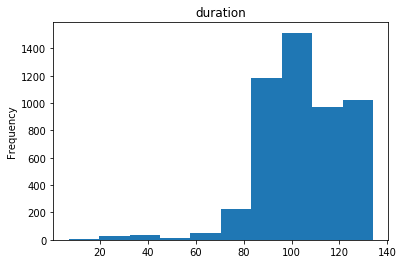

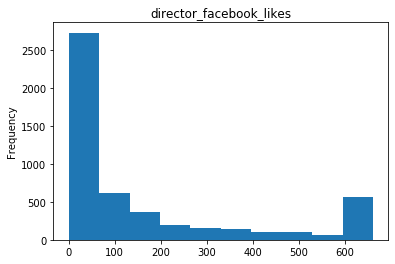

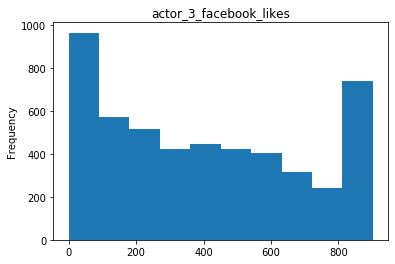

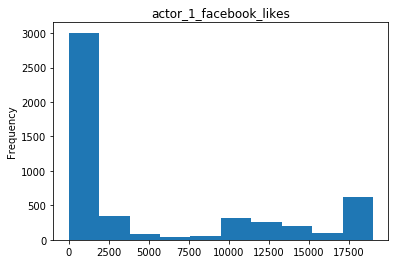

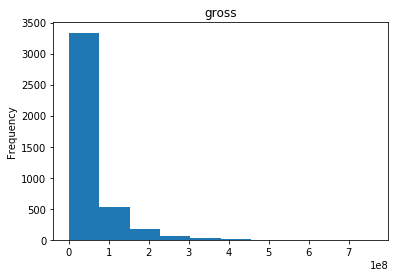

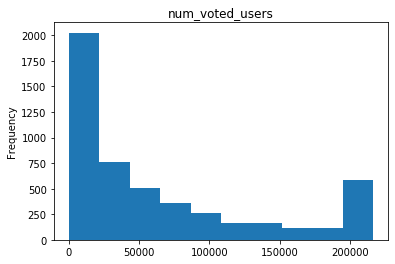

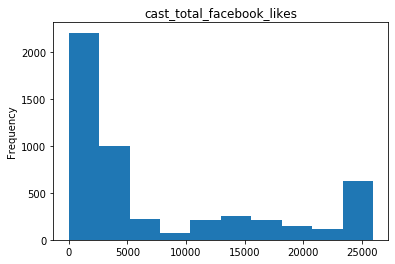

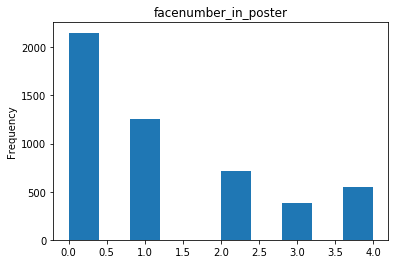

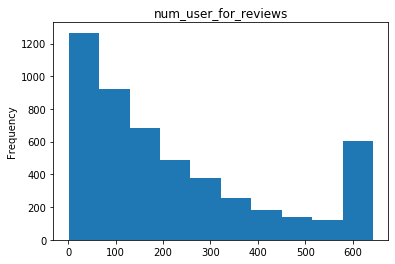

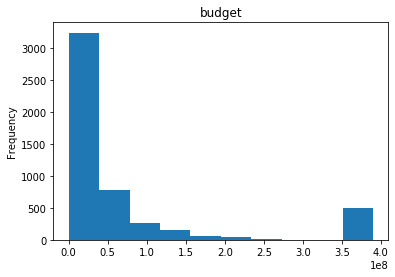

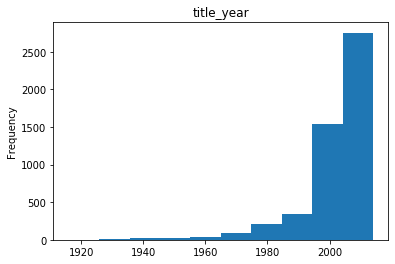

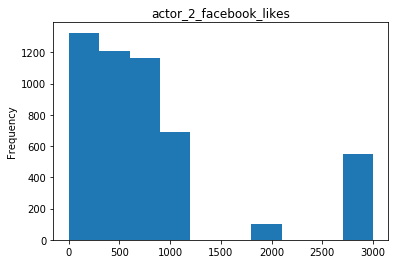

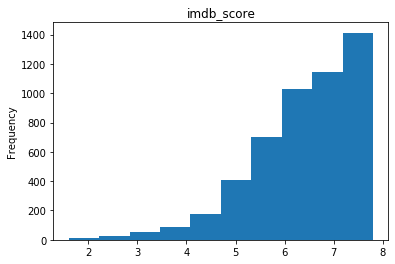

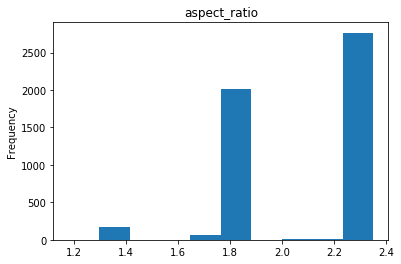

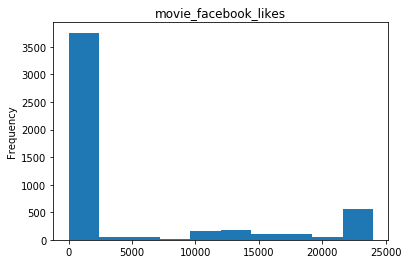

In [7]:
from scipy.stats.mstats import winsorize
for column in df.select_dtypes(include=[np.float64,np.int64]): 
    plt.hist(winsorize(df[column],(0,0.10)))
    plt.title(column)
    plt.ylabel('Frequency')
    plt.show()

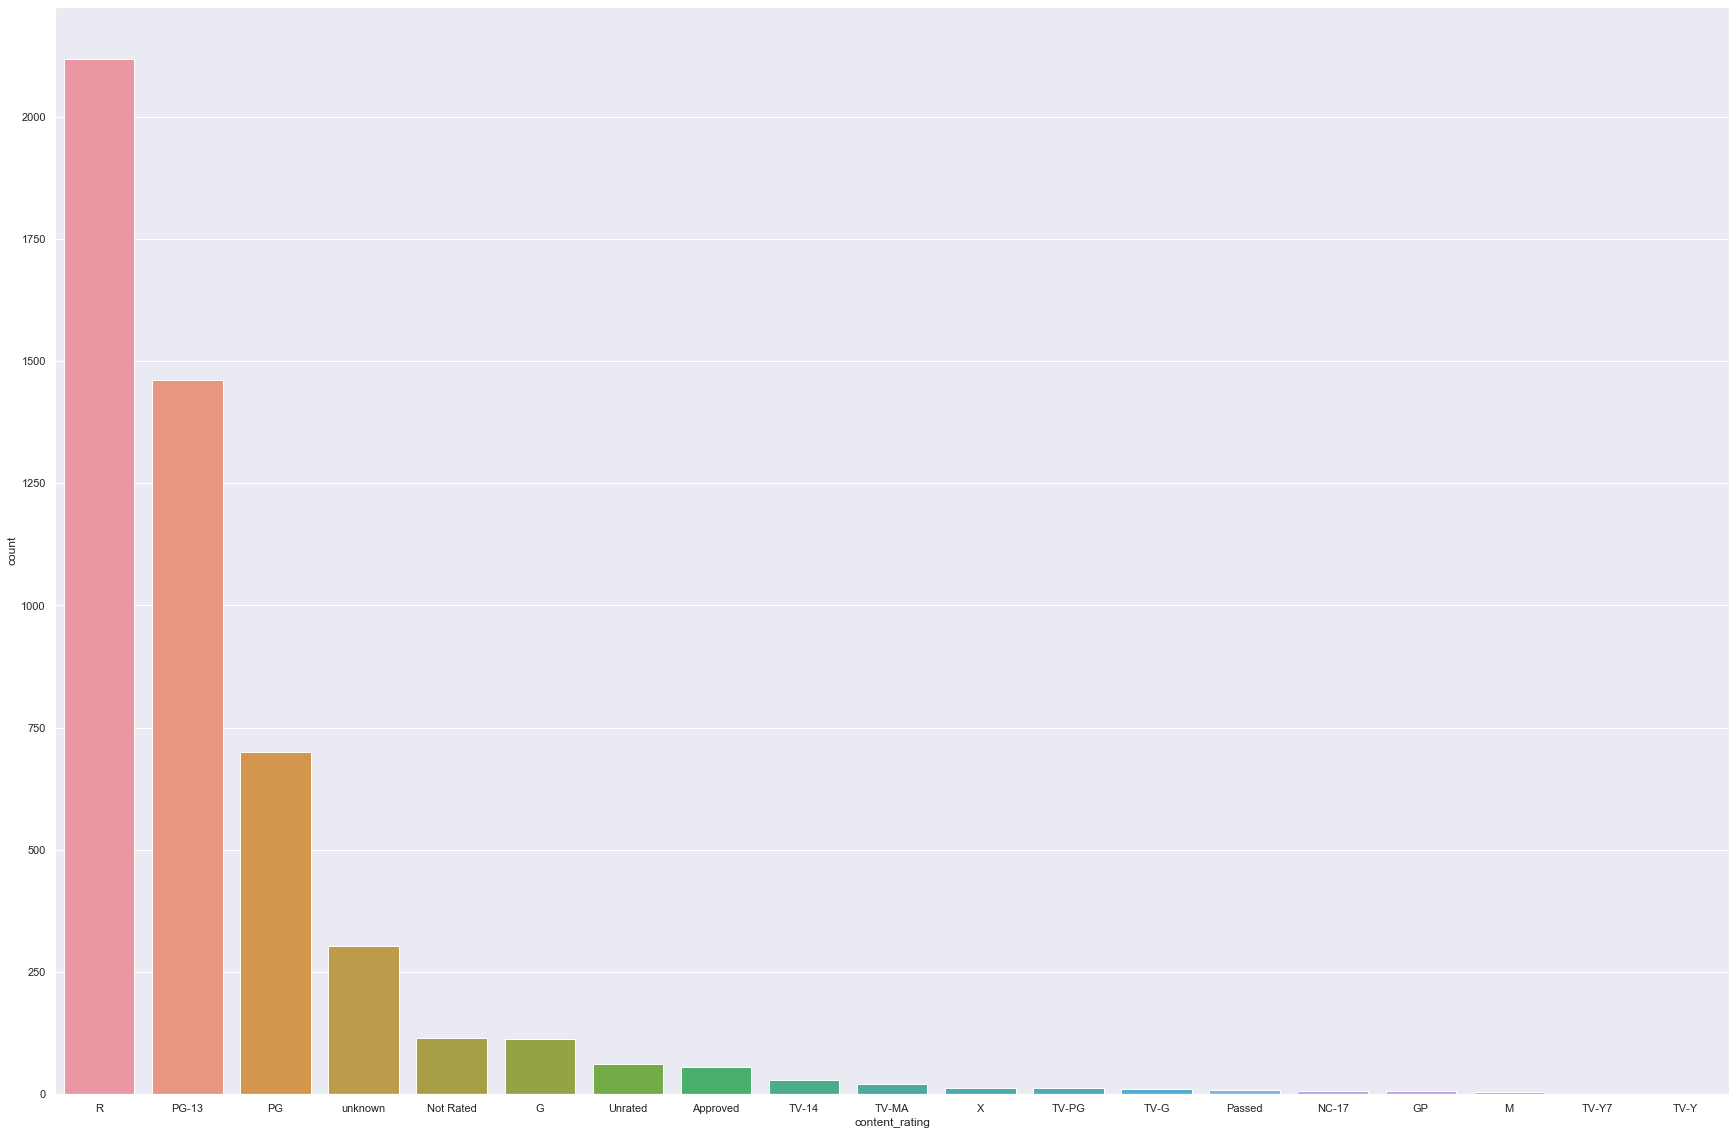

In [24]:
sns.countplot(x='content_rating', data=df, order = df['content_rating'].value_counts().index)
sns.set(rc={'figure.figsize':(30,20)})

R was the most common film rating.

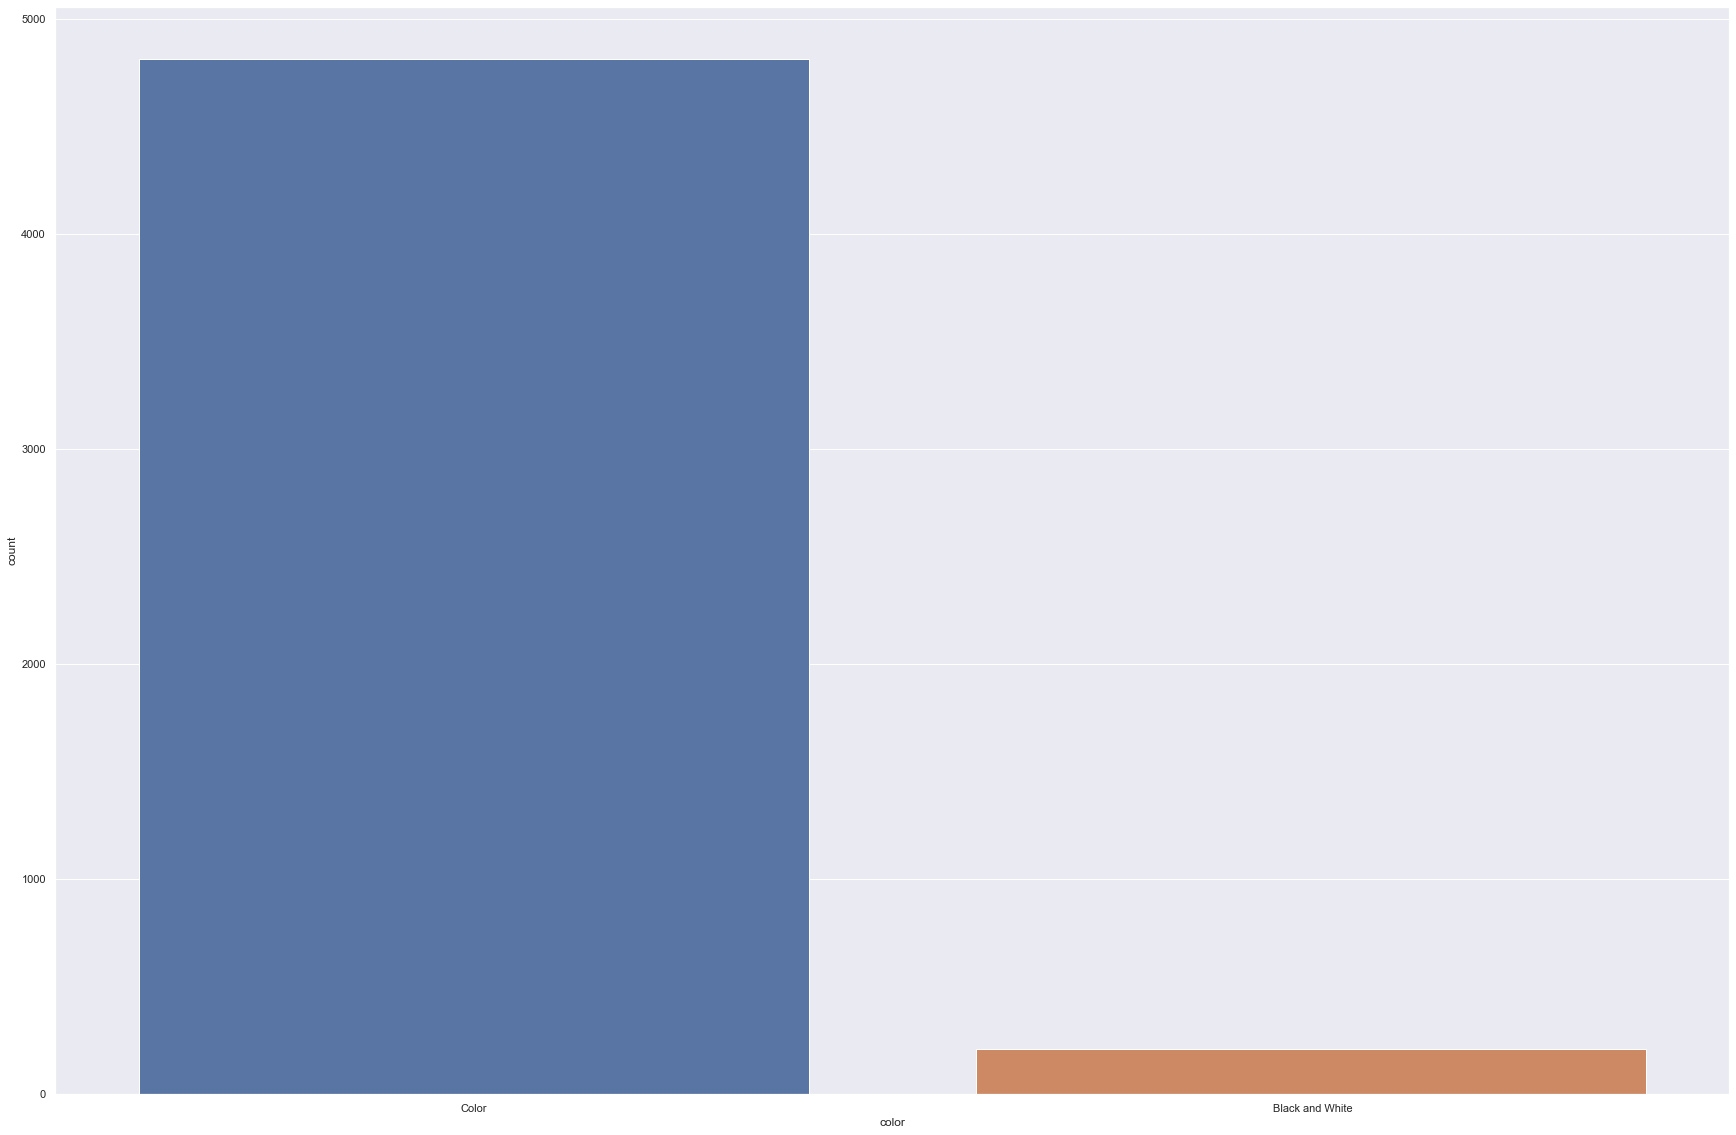

In [9]:
sns.countplot(x='color', data=df, order = df['color'].value_counts().index)
sns.set(rc={'figure.figsize':(30,20)})

There were around 4000 more color films than black and white films

### Data Cleaning

#### Missing Values

Next, I will explore the nature of the missing data.

In [10]:
df.isnull().sum()*100/df.isnull().count()

color                         0.376760
director_name                 2.062265
num_critic_for_reviews        0.991473
duration                      0.297442
director_facebook_likes       2.062265
actor_3_facebook_likes        0.456078
actor_2_name                  0.257783
actor_1_facebook_likes        0.138806
gross                        17.529248
genres                        0.000000
actor_1_name                  0.138806
movie_title                   0.000000
num_voted_users               0.000000
cast_total_facebook_likes     0.000000
actor_3_name                  0.456078
facenumber_in_poster          0.257783
plot_keywords                 3.033908
movie_imdb_link               0.000000
num_user_for_reviews          0.416419
language                      0.237954
country                       0.099147
content_rating                6.008328
budget                        9.756098
title_year                    2.141582
actor_2_facebook_likes        0.257783
imdb_score               

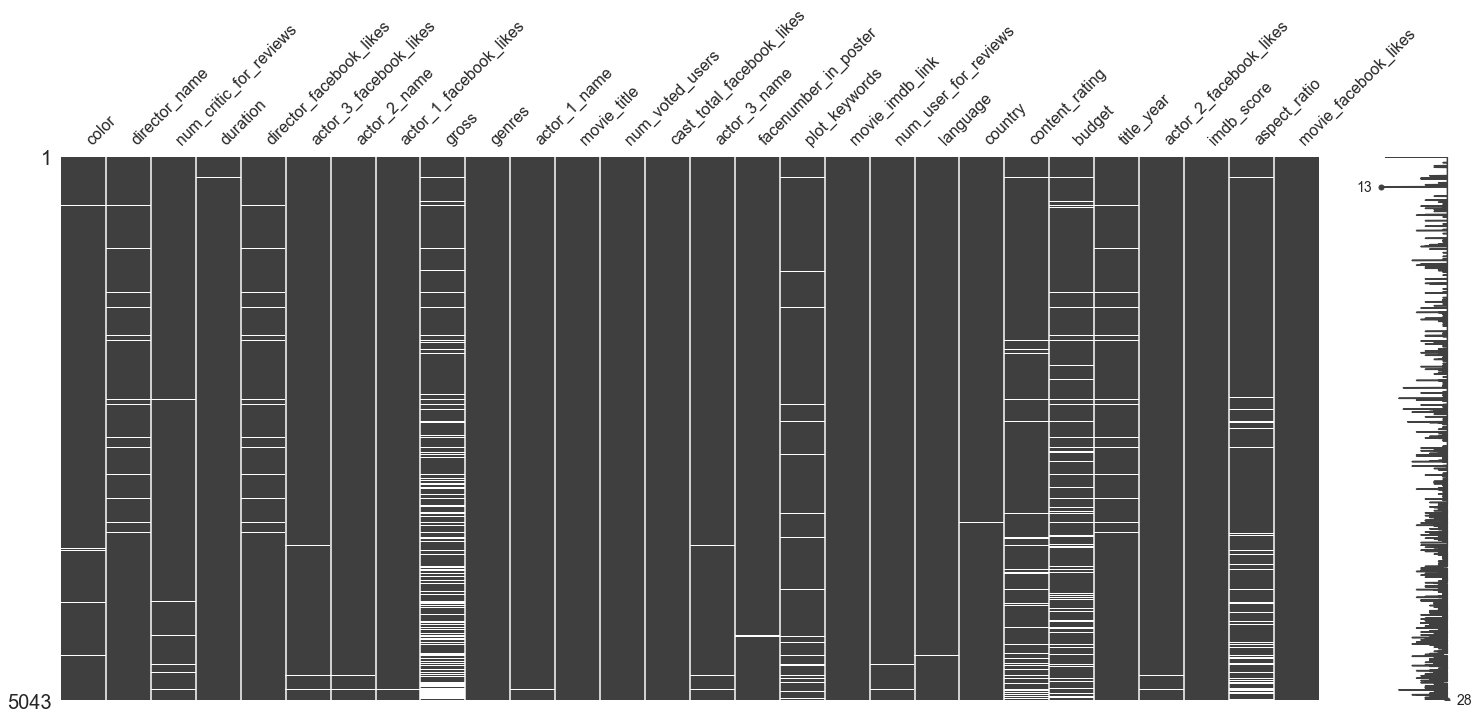

In [11]:
import missingno as msno 
msno.matrix(df) 

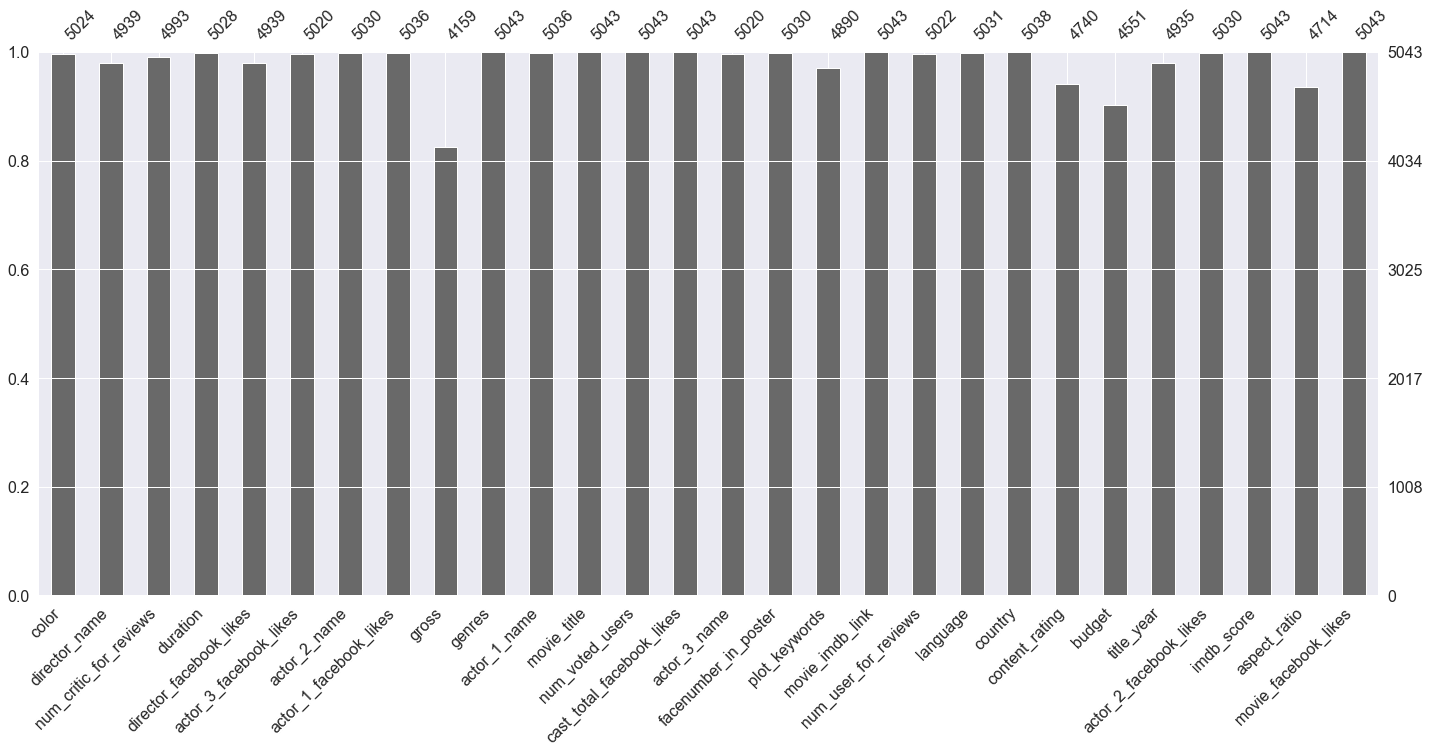

In [12]:
msno.bar(df) 

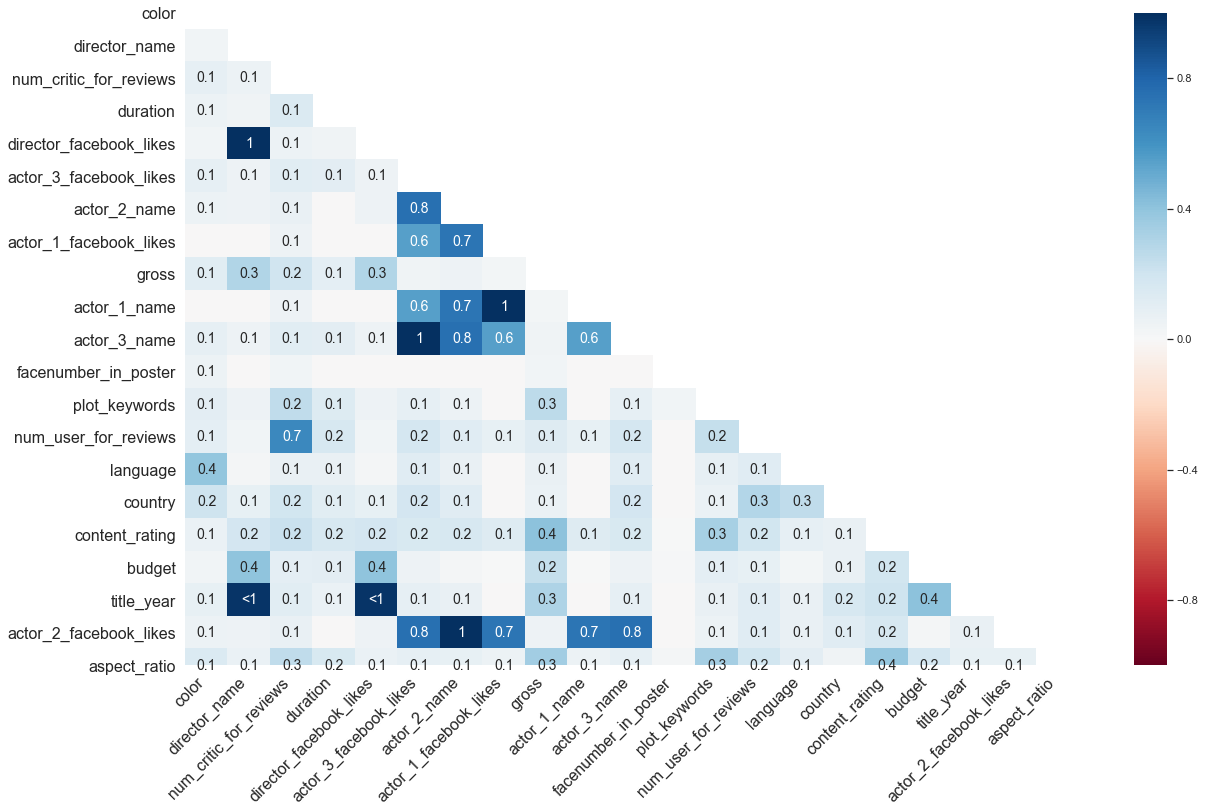

In [13]:
msno.heatmap(df)

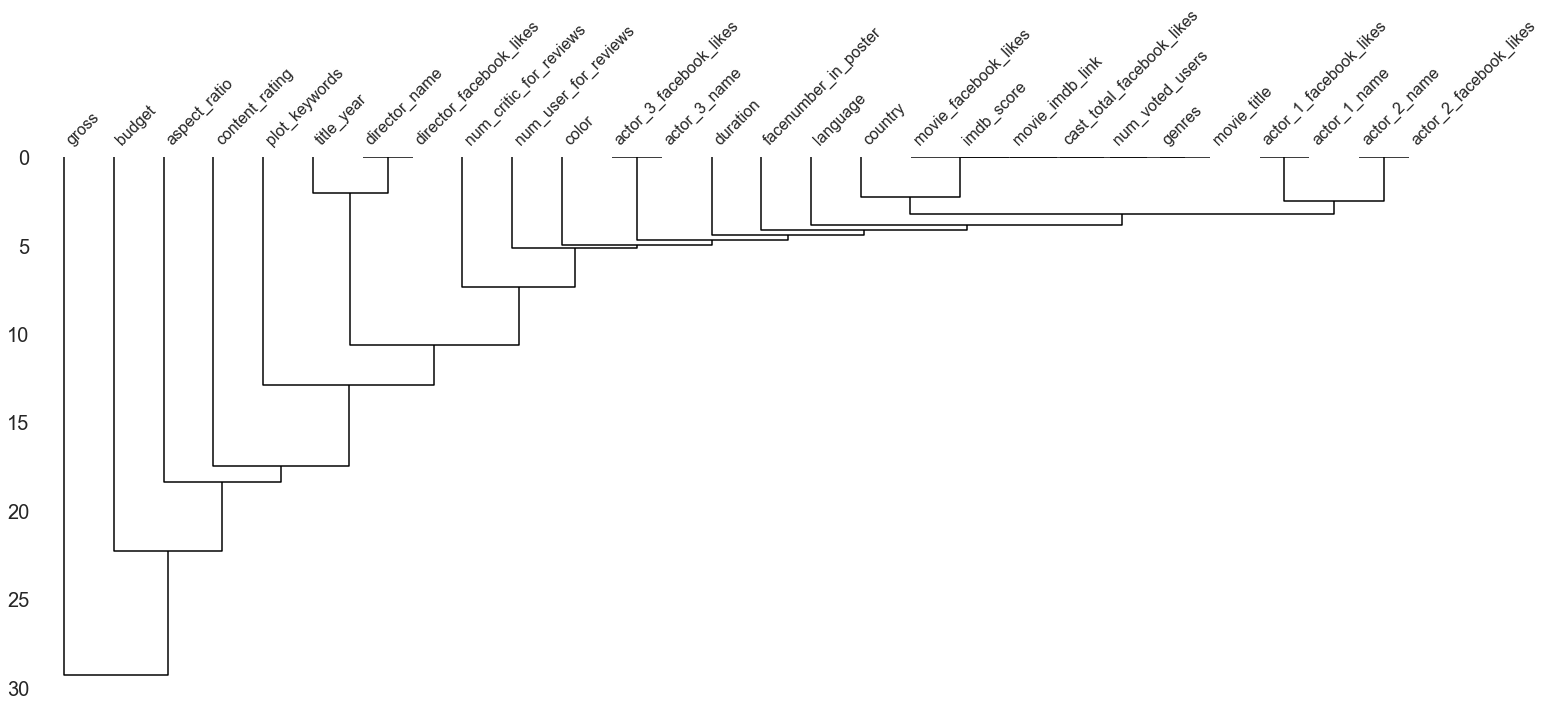

In [14]:
msno.dendrogram(df)

While movies that are missing data about either one of the actors or the director are more likely to be missing data about another of the actors, there does not appear to be any significant correlation between missing actor/director data and any other variables. Therefore, I conclude that the data missing in this dataset appears to be missing at random (MAR).

Because we are dealing with MAR data, I have chose to use imputation methods to fill in the missing data. For the categorical/nominal values, I will fill in the missing data with the word unknown. Because we are not using time series data, I have chosen to use fill in this missing data with a measure of central tendency. In this case, i have chosen the because of the skewed nature of data revealed by the histograms earlier.

In [15]:
for column in df.select_dtypes(include='object'):
    df[column].fillna('unknown', inplace=True)

In [16]:
for column in df.select_dtypes(include=[np.float64,np.int64]):
    df[column].fillna(df[column].median(), inplace=True)

In [17]:
df.isnull().sum()*100/df.isnull().count()

color                        0.0
director_name                0.0
num_critic_for_reviews       0.0
duration                     0.0
director_facebook_likes      0.0
actor_3_facebook_likes       0.0
actor_2_name                 0.0
actor_1_facebook_likes       0.0
gross                        0.0
genres                       0.0
actor_1_name                 0.0
movie_title                  0.0
num_voted_users              0.0
cast_total_facebook_likes    0.0
actor_3_name                 0.0
facenumber_in_poster         0.0
plot_keywords                0.0
movie_imdb_link              0.0
num_user_for_reviews         0.0
language                     0.0
country                      0.0
content_rating               0.0
budget                       0.0
title_year                   0.0
actor_2_facebook_likes       0.0
imdb_score                   0.0
aspect_ratio                 0.0
movie_facebook_likes         0.0
dtype: float64

In [18]:
df

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,unknown,Doug Walker,110.0,103.0,131.0,371.5,Rob Walker,131.0,25517500.0,Documentary,...,156.0,unknown,unknown,unknown,20000000.0,2005.0,12.0,7.1,2.35,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,25517500.0,Comedy|Drama,...,6.0,English,Canada,unknown,20000000.0,2013.0,470.0,7.7,2.35,84
5039,Color,unknown,43.0,43.0,49.0,319.0,Valorie Curry,841.0,25517500.0,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,20000000.0,2005.0,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,25517500.0,Drama|Horror|Thriller,...,3.0,English,USA,unknown,1400.0,2013.0,0.0,6.3,2.35,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,20000000.0,2012.0,719.0,6.3,2.35,660


#### Outliers

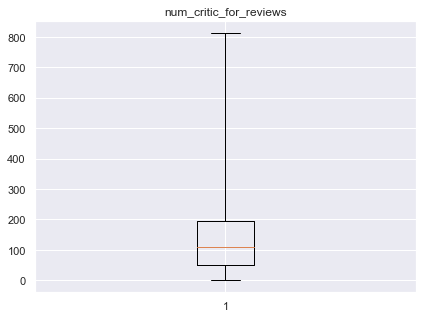

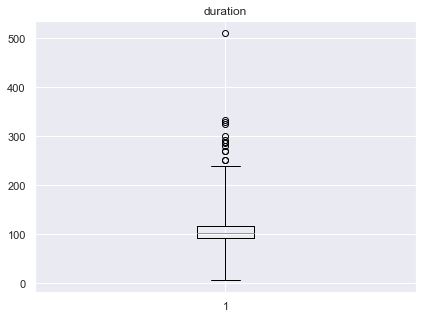

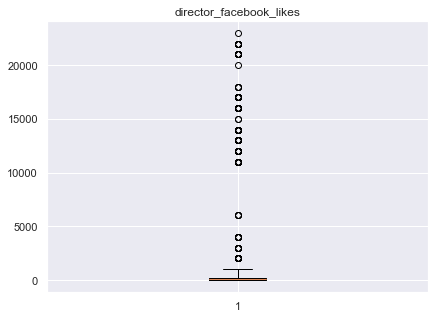

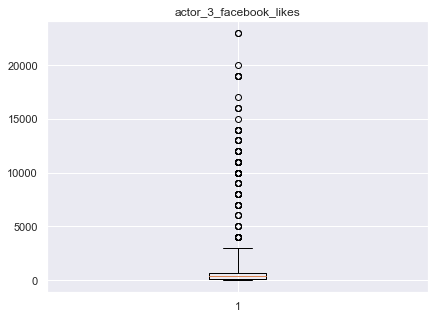

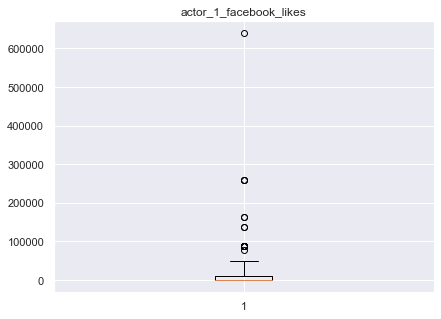

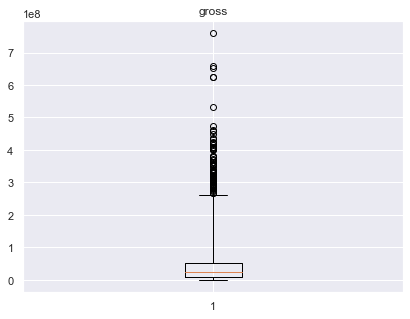

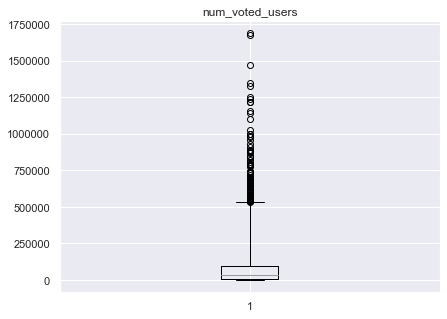

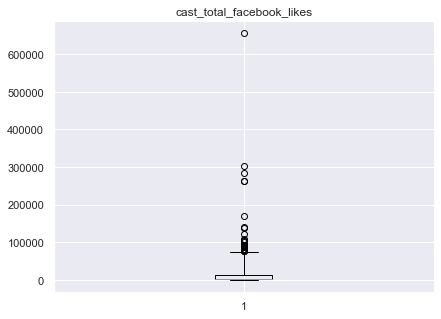

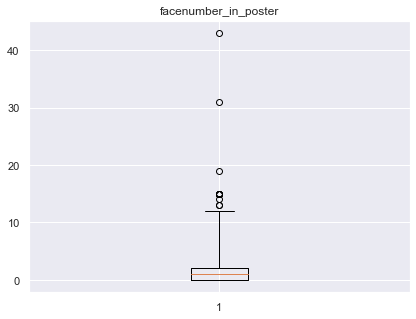

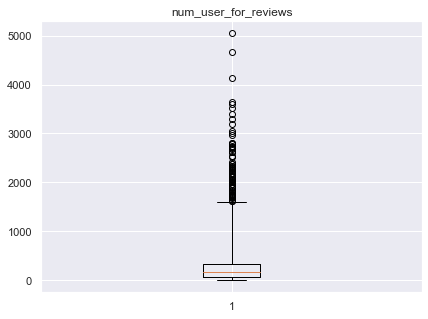

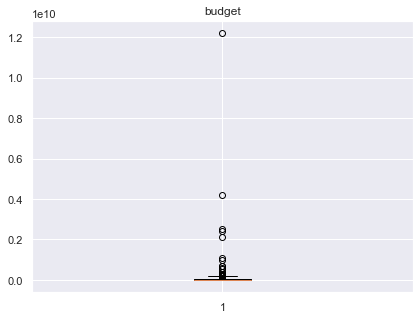

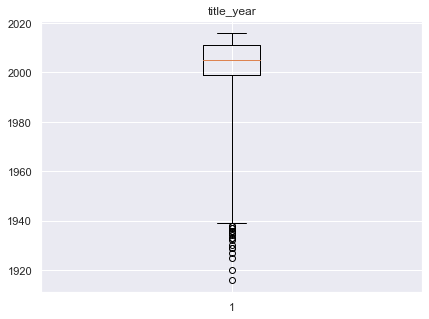

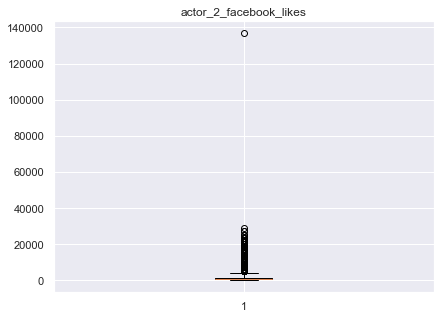

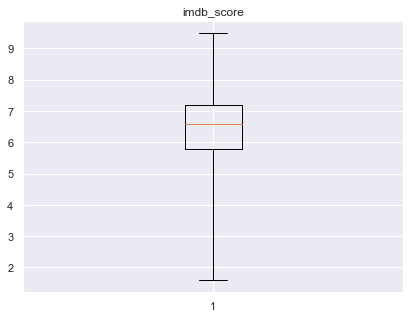

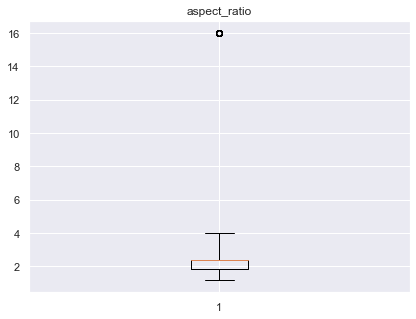

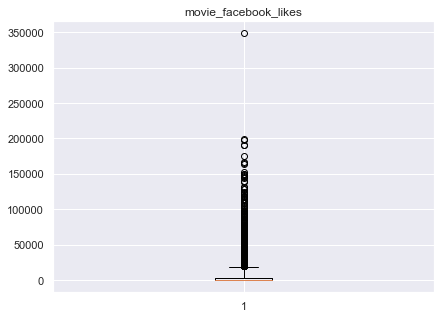

In [19]:
for column in df.select_dtypes(include=[np.float64,np.int64]):    
    plt.figure(figsize = (15,5))

    plt.subplot(1,2,1)
    plt.boxplot(df[column], whis = 5)
    plt.title(column)


From the boxplots above, we can see that there are outliers in the data, so we will winsorize those outliers and plot new boxplots.

In [20]:
for column in df[['duration', 'director_facebook_likes', 'actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross', 'num_voted_users', 'cast_total_facebook_likes', 'facenumber_in_poster', 'num_user_for_reviews', 'budget', 'actor_2_facebook_likes', 'aspect_ratio', 'movie_facebook_likes']]:
    df[[column]] = winsorize(df[column], (0, 0.10))

In [21]:
df[['title_year']] = winsorize(df['title_year'], (0.10, 0))

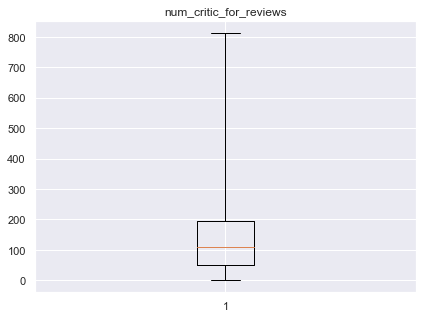

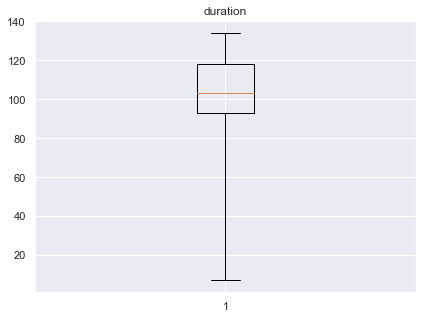

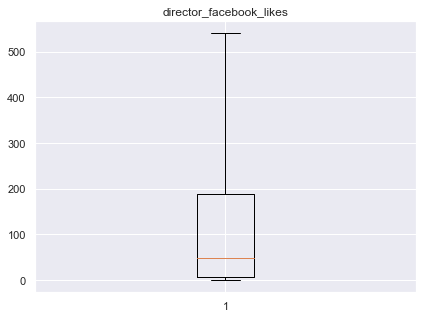

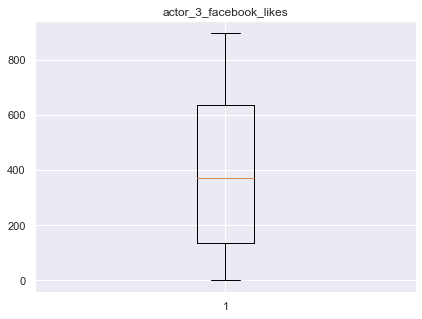

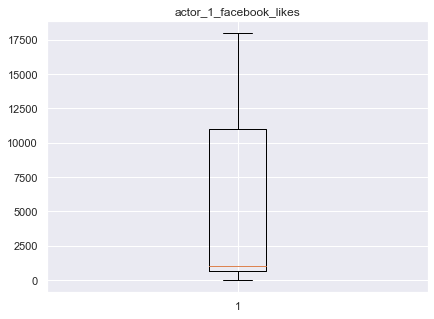

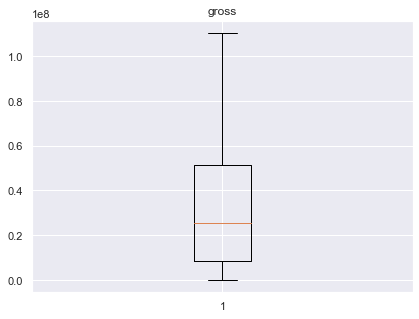

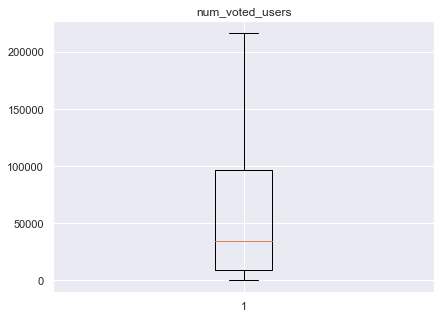

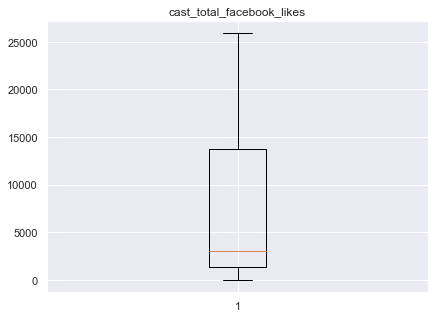

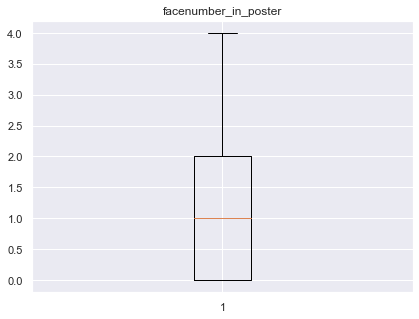

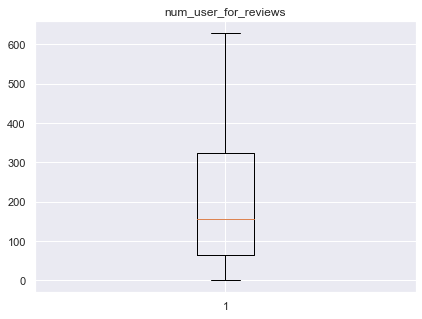

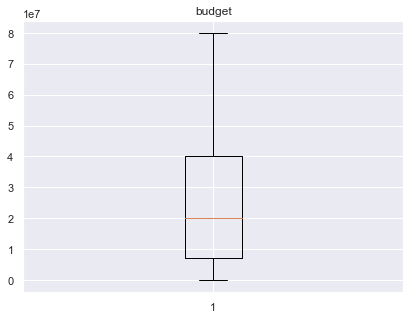

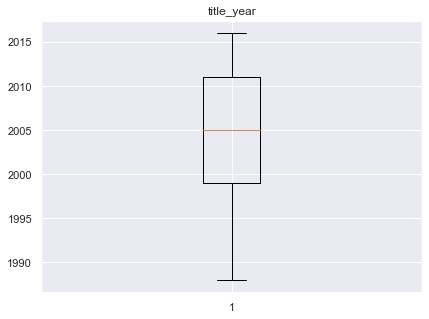

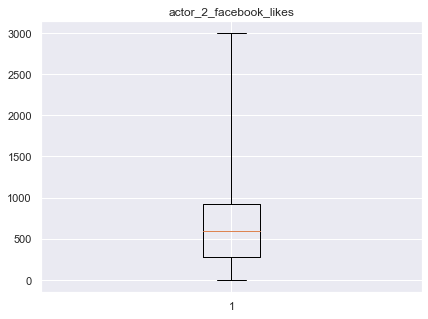

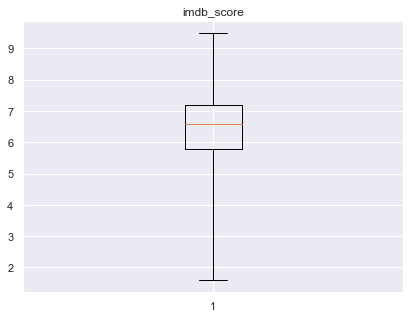

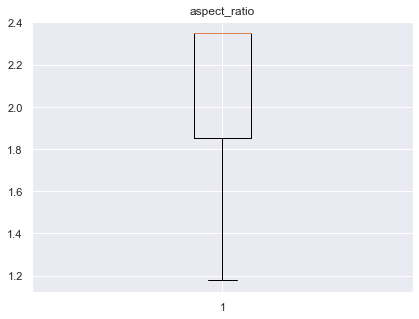

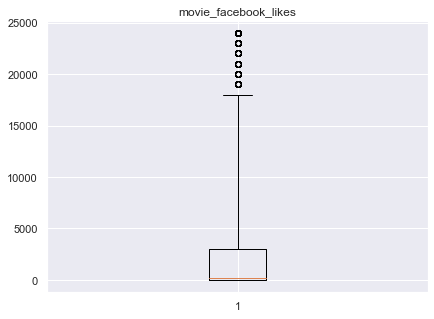

In [22]:
for column in df.select_dtypes(include=[np.float64,np.int64]):    
    plt.figure(figsize = (15,5))

    plt.subplot(1,2,1)
    plt.boxplot(df[column], whis = 5)
    plt.title(column)

In [23]:
df.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5.043000e+03,5043.000000,5043.000000,5043.000000,5043.000000,5.043000e+03,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000
mean,139.894904,104.863970,136.906802,401.677870,5183.881221,3.599729e+07,64295.643070,7759.755899,1.181836,221.684117,2.732871e+07,2003.985723,812.623438,6.442138,2.104293,4638.000991
std,121.034214,18.320339,180.260364,292.138677,6612.171615,3.465301e+07,70788.705327,8771.335137,1.336060,196.926237,2.515807e+07,8.132103,837.701652,1.125116,0.286063,8268.017995
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000,0.000000,0.000000,1.000000,2.180000e+02,1988.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,134.500000,615.500000,8.460992e+06,8593.500000,1411.000000,0.000000,65.000000,7.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,34359.000000,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,194.000000,118.000000,189.000000,635.000000,11000.000000,5.135707e+07,96309.000000,13756.500000,2.000000,324.000000,4.000000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,134.000000,541.000000,897.000000,18000.000000,1.104768e+08,216581.000000,25942.000000,4.000000,629.000000,8.000000e+07,2016.000000,3000.000000,9.500000,2.350000,24000.000000


From the boxplots and descriptions above, we are provided some interesting data. The average duration of movies is approximately 104 minutes. The average movie in this dataset has about 139 critic reviews. The average box office gross is approximately 36 million USD. The average budget of these movies is approximately 27 million USD. The average release date for films is around 2003. The average IMDB score is approximately 6.4. The average movie has approximately 5043 facebook likes. The average cast for a movie has approximately 7759 facebook likes.

#### Feature Engineering

Next, I used label encoding to provide numerical values to categories in order to model the data.

In [23]:
from sklearn.preprocessing import LabelEncoder
for column in df.select_dtypes(include='object'):
    df[[column]] = df[[column]].apply(LabelEncoder().fit_transform)

In [24]:
df

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,1,922,723.0,134.0,0.0,855.0,1405,1000.0,110476776.0,106,...,629.0,11,62,7,80000000.0,2009.0,936.0,7.9,1.78,24000
1,1,794,302.0,134.0,541.0,897.0,2216,18000.0,110476776.0,100,...,629.0,11,62,7,80000000.0,2007.0,3000.0,7.1,2.35,0
2,1,2021,602.0,134.0,0.0,161.0,2487,11000.0,110476776.0,127,...,629.0,11,61,7,80000000.0,2015.0,393.0,6.8,2.35,24000
3,1,373,813.0,134.0,541.0,897.0,532,18000.0,110476776.0,287,...,629.0,11,62,7,80000000.0,2012.0,3000.0,8.5,2.35,24000
4,2,600,110.0,103.0,131.0,371.5,2431,131.0,25517500.0,753,...,156.0,47,65,18,20000000.0,2005.0,12.0,7.1,2.35,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,1,2047,1.0,87.0,2.0,318.0,671,637.0,25517500.0,605,...,6.0,11,10,18,20000000.0,2013.0,470.0,7.7,2.35,84
5039,1,2394,43.0,43.0,49.0,319.0,2904,841.0,25517500.0,735,...,359.0,11,62,10,20000000.0,2005.0,593.0,7.5,2.35,24000
5040,1,186,13.0,76.0,0.0,0.0,1972,0.0,25517500.0,823,...,3.0,11,62,18,1400.0,2013.0,0.0,6.3,2.35,16
5041,1,453,14.0,100.0,0.0,489.0,649,946.0,10443.0,638,...,9.0,11,62,7,20000000.0,2012.0,719.0,6.3,2.35,660


In [25]:
x = df.select_dtypes(include=['number'])

# Dimensionality Reduction

Next, we use dimensionality reduction techniques to allow for easier visualization of the data and combat the curse of dimensionality.

In [26]:
scaler = StandardScaler()
x_std = scaler.fit_transform(x)

#### PCA

In [27]:
pca = PCA(n_components=2).fit_transform(x_std)

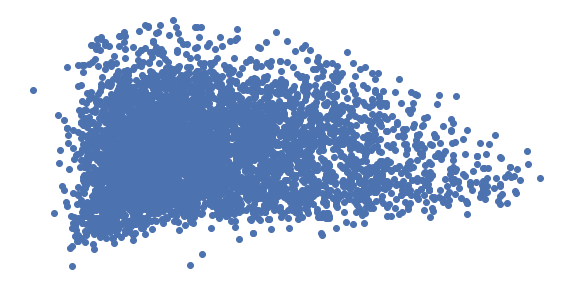

In [28]:
plt.figure(figsize=(10,5))
plt.scatter(pca[:, 0], pca[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

#### UMAP

In [29]:
import umap
umap_results = umap.UMAP(n_neighbors=5,
                      min_dist=.3,
                      metric='correlation').fit_transform(x_std)

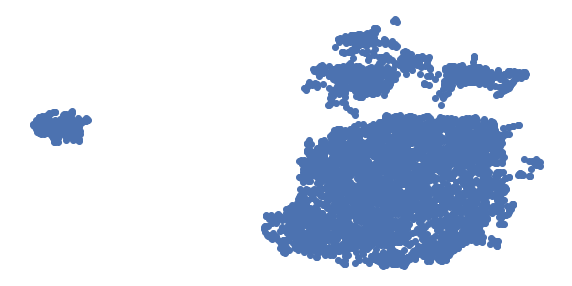

In [30]:
plt.figure(figsize=(10,5))
plt.scatter(umap_results[:, 0], umap_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

I chose to move forward with UMAP as my dimensionality reduction technique because it returned more distinct clusters than PCA.

# Clustering

Next, we will compare Kmeans and GMM modeling and evaluate which model provides the best predictive value for our dataset.

#### Kmeans

In [31]:
kmeans = KMeans(n_clusters=3)  
kmeans.fit(umap_results)  
print('\nCluster centres:')
print(kmeans.cluster_centers_)


Cluster centres:
[[  0.9787107    3.6859393 ]
 [  0.01297588  -3.75595   ]
 [-11.875051     2.557778  ]]


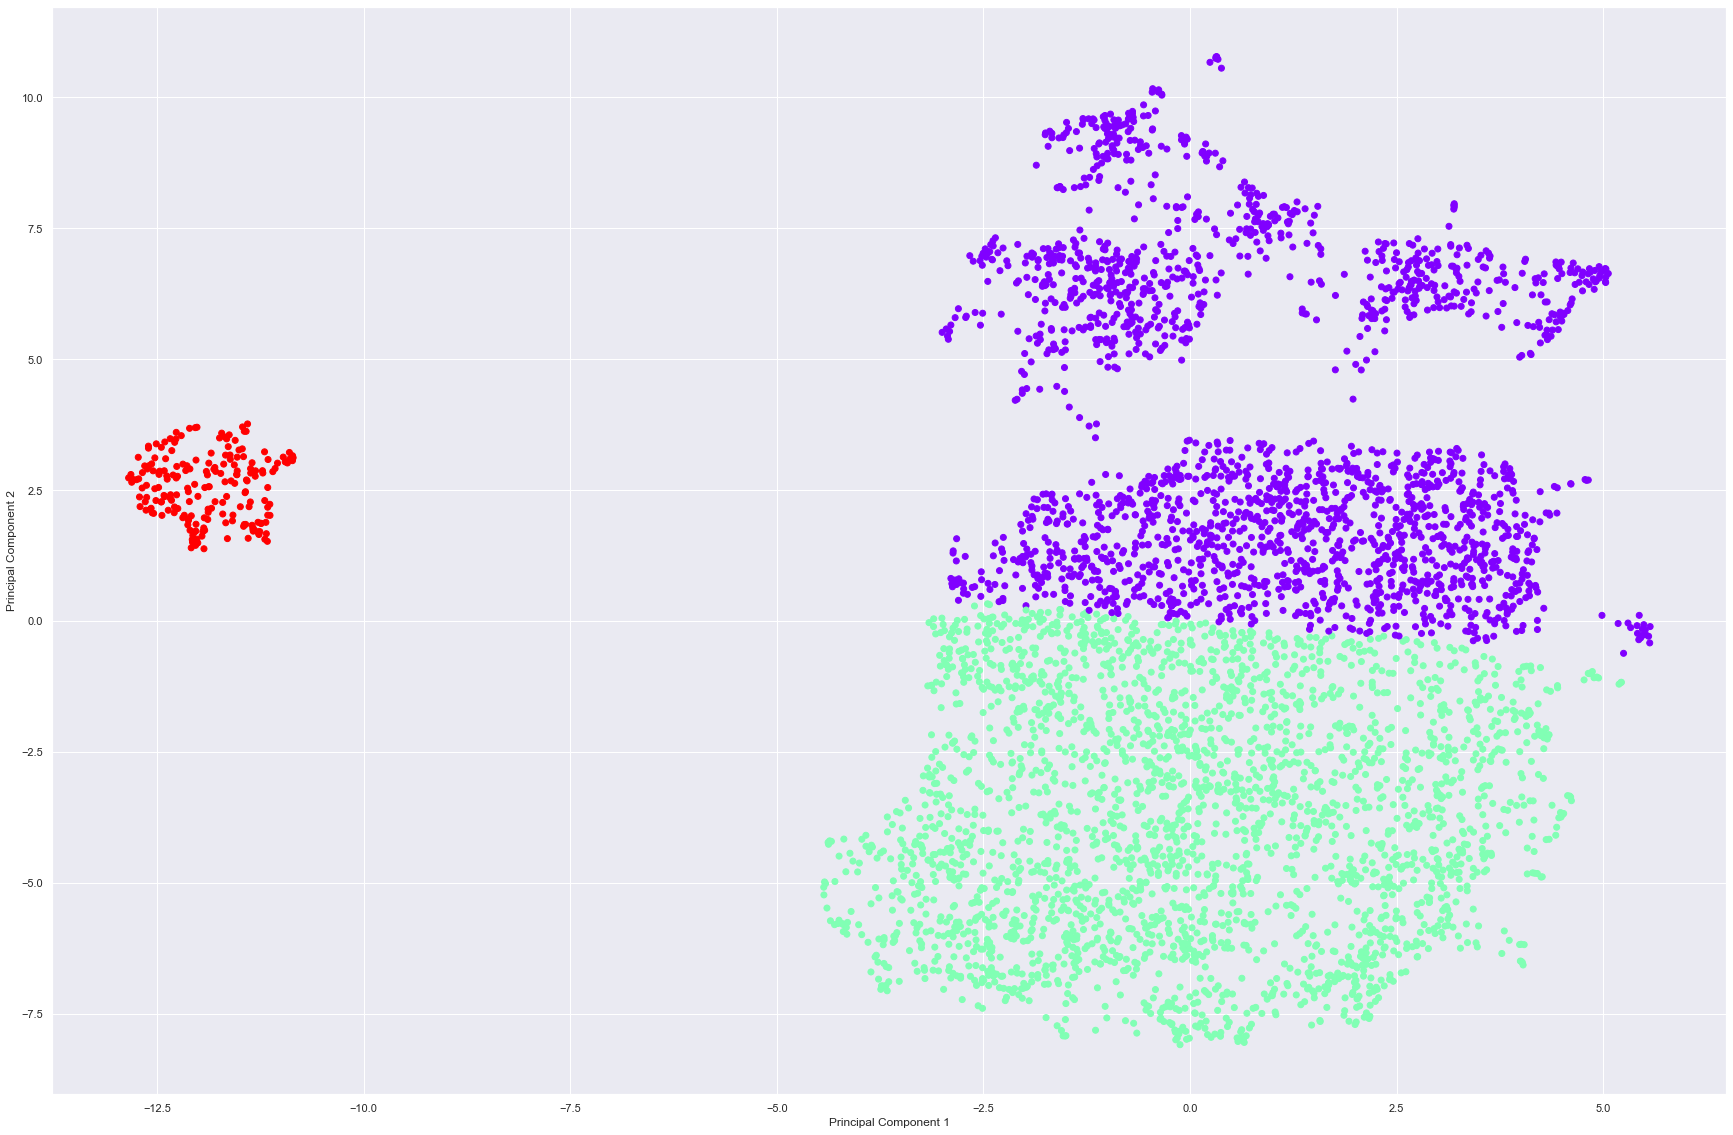

In [32]:
labels = kmeans.labels_

plt.scatter(umap_results[:,0],umap_results[:,1],
            c=labels, cmap=plt.cm.rainbow)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [33]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(umap_results)
    Sum_of_squared_distances.append(km.inertia_)

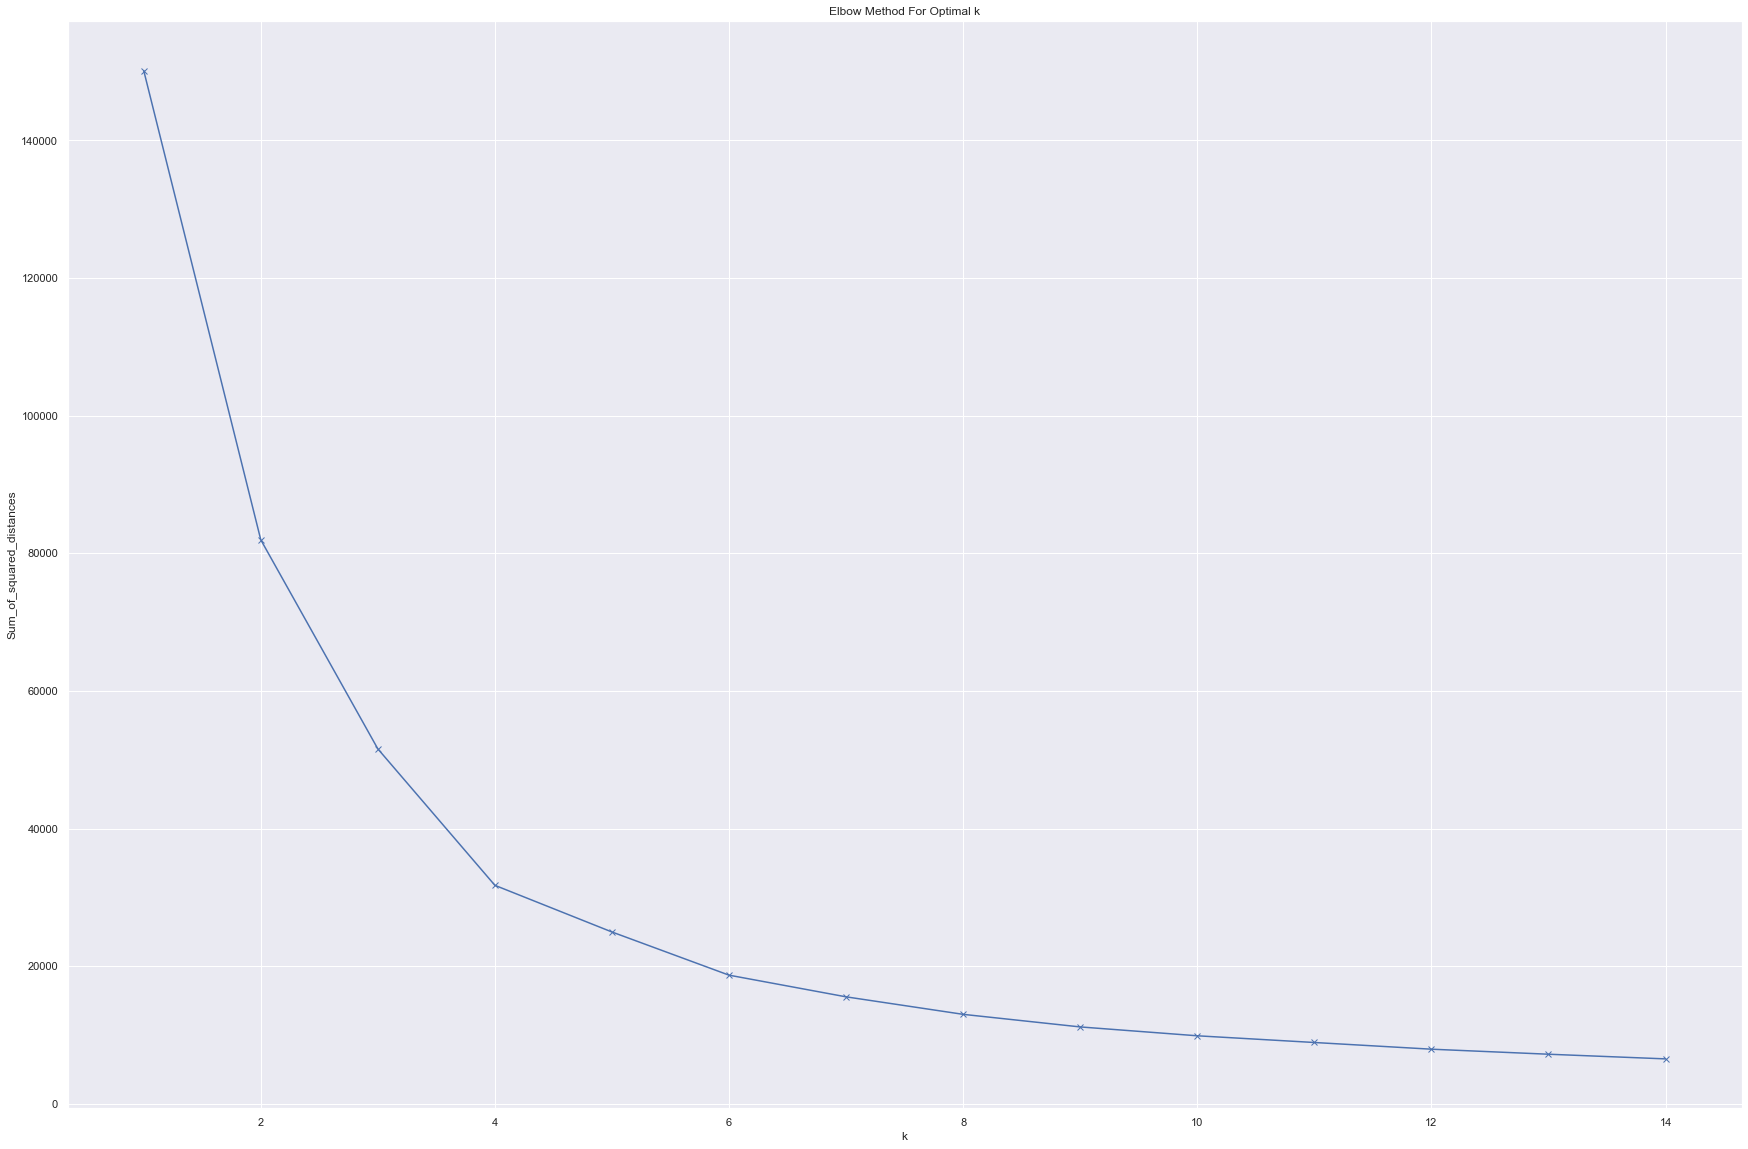

In [34]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [35]:
from sklearn import metrics
labels = KMeans(n_clusters = 4).fit_predict(umap_results)
print(metrics.silhouette_score(umap_results, labels, metric='euclidean'))

0.46193847


#### GMM

In [36]:
from sklearn.mixture import GaussianMixture

In [37]:
# Defining the agglomerative clustering
gmm_cluster = GaussianMixture(n_components=5, random_state=123, covariance_type="full")

# Fit model
clusters = gmm_cluster.fit_predict(umap_results)

print("Silhouette score with covariance_type=full: {}".format(
    metrics.silhouette_score(umap_results, clusters, metric='euclidean')))
print("------------------------------------------------------")

# Defining the agglomerative clustering
gmm_cluster = GaussianMixture(n_components=5, random_state=123, covariance_type="tied")

# Fit model
clusters = gmm_cluster.fit_predict(umap_results)

print("Silhouette score with covariance_type=tied: {}".format(
    metrics.silhouette_score(umap_results, clusters, metric='euclidean')))
print("------------------------------------------------------")

# Defining the agglomerative clustering
gmm_cluster = GaussianMixture(n_components=5, random_state=123, covariance_type="diag")

# Fit model
clusters = gmm_cluster.fit_predict(umap_results)

print("Silhouette score with covariance_type=diag: {}".format(
    metrics.silhouette_score(umap_results, clusters, metric='euclidean')))
print("------------------------------------------------------")


# Defining the agglomerative clustering
gmm_cluster = GaussianMixture(n_components=5, random_state=123, covariance_type="spherical")

# Fit model
clusters = gmm_cluster.fit_predict(umap_results)

print("Silhouette score with covariance_type=spherical: {}".format(
    metrics.silhouette_score(umap_results, clusters, metric='euclidean')))
print("------------------------------------------------------")

Silhouette score with covariance_type=full: 0.42699939012527466
------------------------------------------------------
Silhouette score with covariance_type=tied: 0.4086507260799408
------------------------------------------------------
Silhouette score with covariance_type=diag: 0.4251387417316437
------------------------------------------------------
Silhouette score with covariance_type=spherical: 0.41421499848365784
------------------------------------------------------


In [38]:
def SelBest(arr:list, X:int)->list:
    '''
    returns the set of X configurations with shorter distance
    '''
    dx=np.argsort(arr)[:X]
    return arr[dx]

In [40]:
n_clusters=np.arange(2, 20)
sils=[]
sils_err=[]
iterations=20
for n in n_clusters:
    tmp_sil=[]
    for _ in range(iterations):
        gmm=GaussianMixture(n, n_init=2, covariance_type="full").fit(umap_results) 
        labels=gmm.predict(umap_results)
        sil=metrics.silhouette_score(umap_results, labels, metric='euclidean')
        tmp_sil.append(sil)
    val=np.mean(SelBest(np.array(tmp_sil), int(iterations/5)))
    err=np.std(tmp_sil)
    sils.append(val)
    sils_err.append(err)


Text(0, 0.5, 'Score')

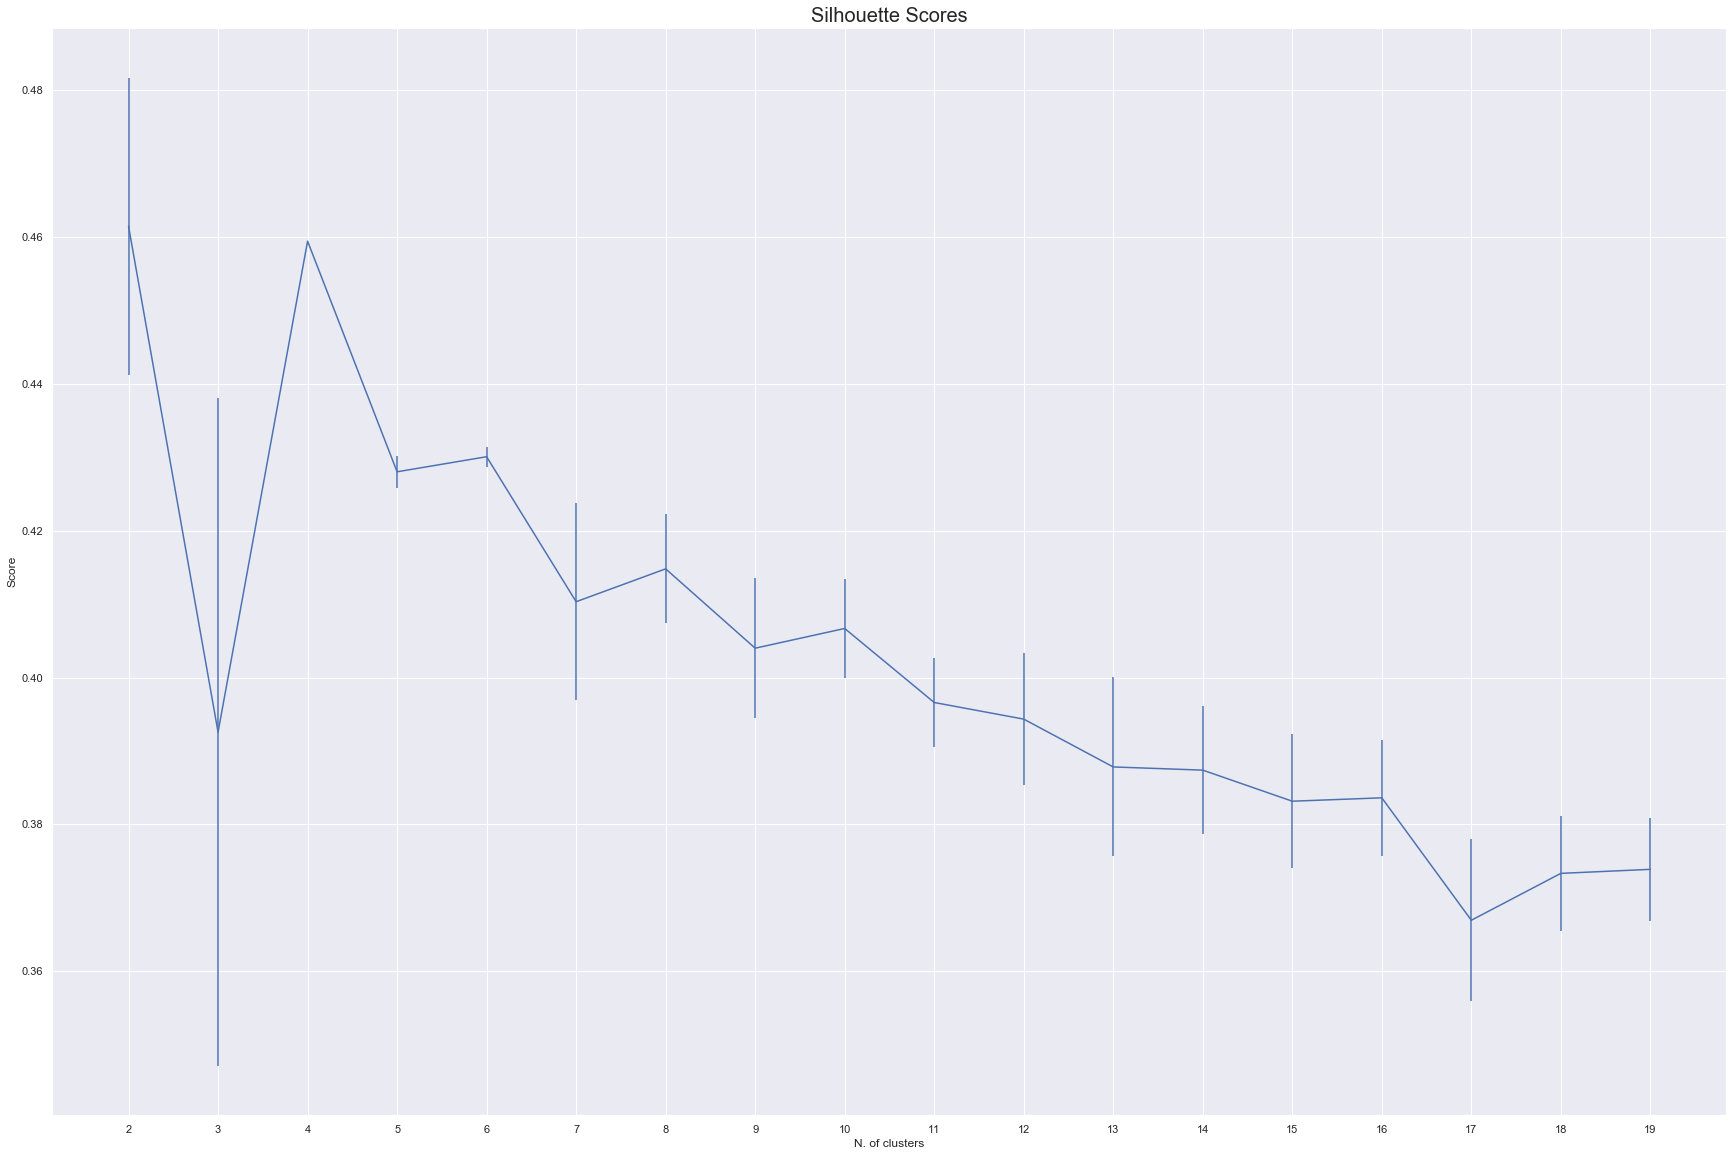

In [41]:
plt.errorbar(n_clusters, sils, yerr=sils_err)
plt.title("Silhouette Scores", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("N. of clusters")
plt.ylabel("Score")

In [42]:
gmm_cluster = GaussianMixture(n_components=4, random_state=123, covariance_type="full")

# Fit model
cluster = gmm_cluster.fit_predict(umap_results)

print("Silhouette score with covariance_type=spherical: {}".format(
    metrics.silhouette_score(umap_results, cluster, metric='euclidean')))

Silhouette score with covariance_type=spherical: 0.4594566822052002


I chose to evaluate my models based on their silhouette scores. As a result of this, I ended up choosing the Kmeans algorithm as the best algorithm for this dataset.

## Visualization of Cluster Features

In [43]:
kmeans = KMeans(n_clusters=4)  
kmeans.fit(umap_results)  
print('\nCluster centres:')
print(kmeans.cluster_centers_)


Cluster centres:
[[ -0.16364309  -4.829678  ]
 [  0.48461112   6.9119306 ]
 [  0.99318415   0.5573967 ]
 [-11.875051     2.557778  ]]


In [44]:
labels = kmeans.labels_
clusters=pd.concat([df, pd.DataFrame({'cluster':labels})], axis=1)
clusters.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,cluster
0,1,922,723.0,134.0,0.0,855.0,1405,1000.0,110476776.0,106,...,11,62,7,80000000.0,2009.0,936.0,7.9,1.78,24000,0
1,1,794,302.0,134.0,541.0,897.0,2216,18000.0,110476776.0,100,...,11,62,7,80000000.0,2007.0,3000.0,7.1,2.35,0,0
2,1,2021,602.0,134.0,0.0,161.0,2487,11000.0,110476776.0,127,...,11,61,7,80000000.0,2015.0,393.0,6.8,2.35,24000,0
3,1,373,813.0,134.0,541.0,897.0,532,18000.0,110476776.0,287,...,11,62,7,80000000.0,2012.0,3000.0,8.5,2.35,24000,0
4,2,600,110.0,103.0,131.0,371.5,2431,131.0,25517500.0,753,...,47,65,18,20000000.0,2005.0,12.0,7.1,2.35,0,1


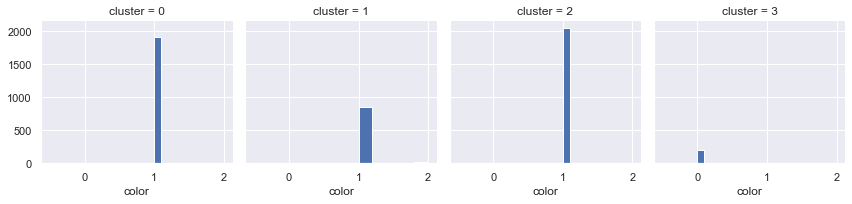

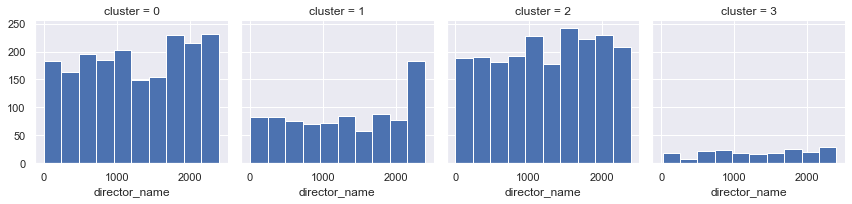

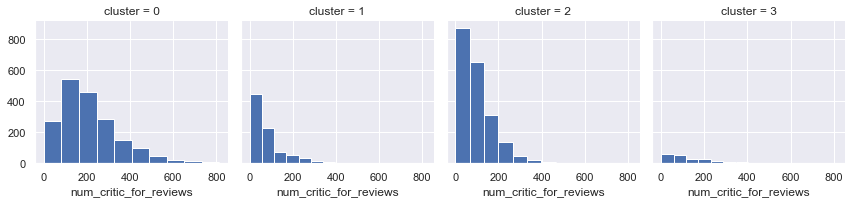

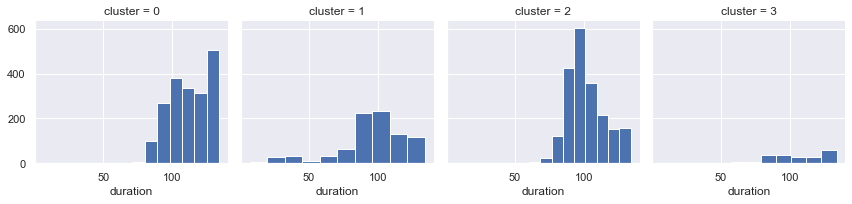

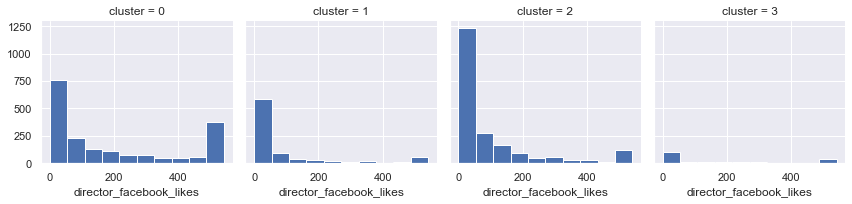

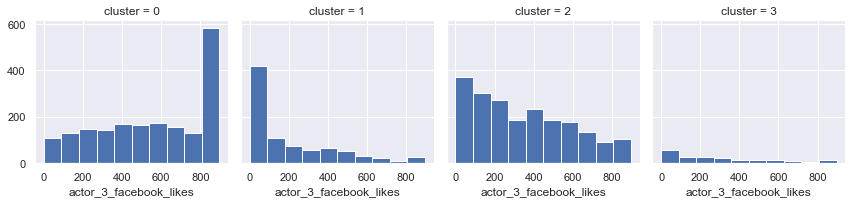

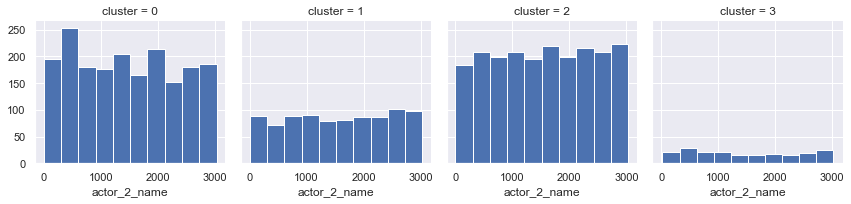

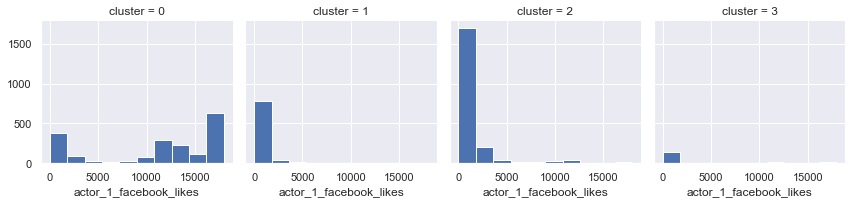

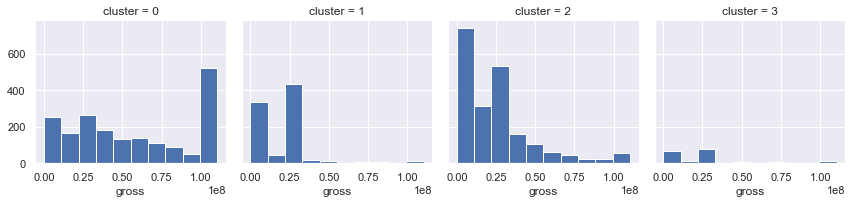

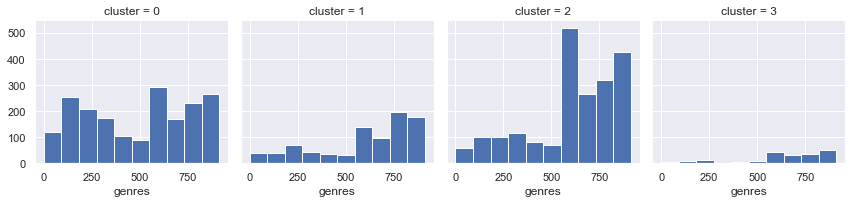

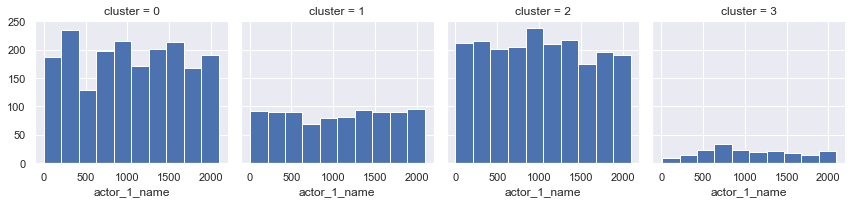

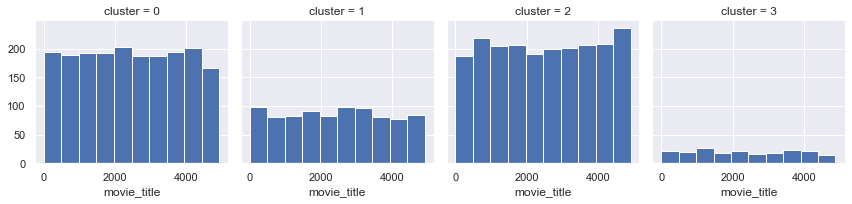

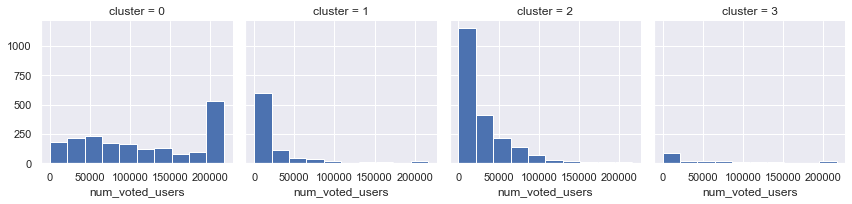

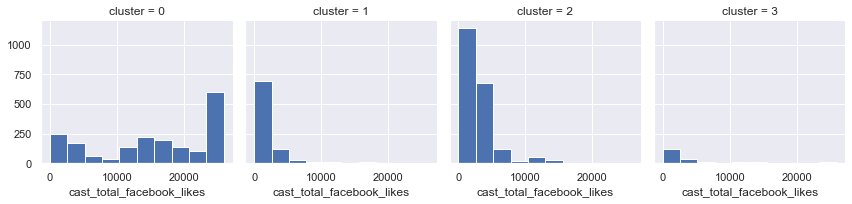

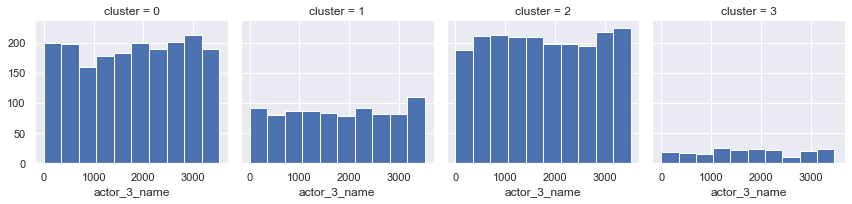

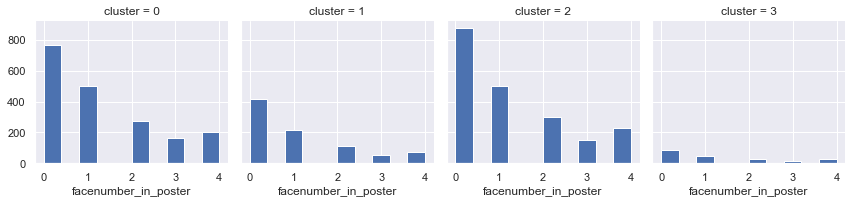

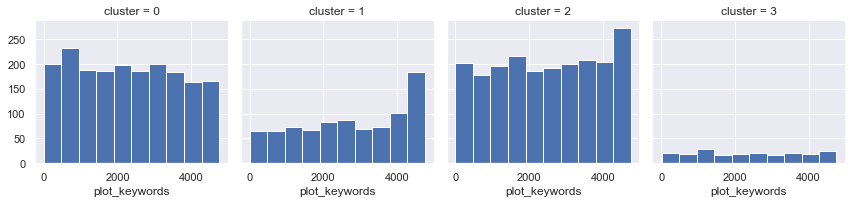

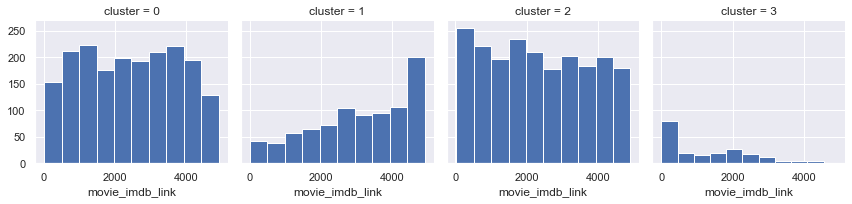

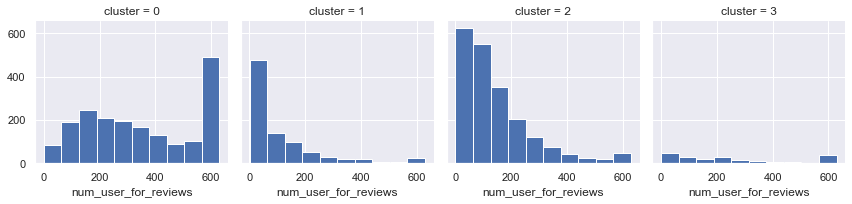

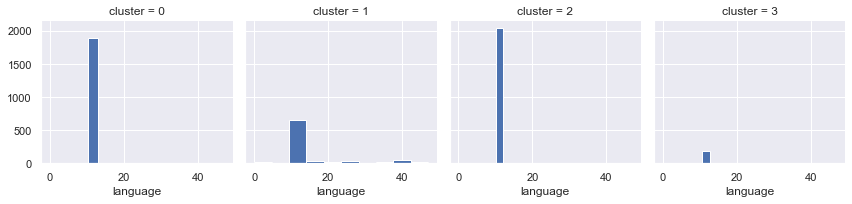

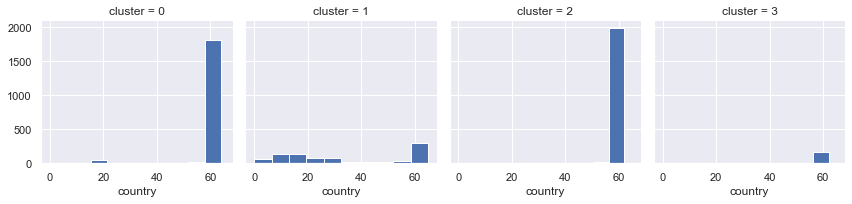

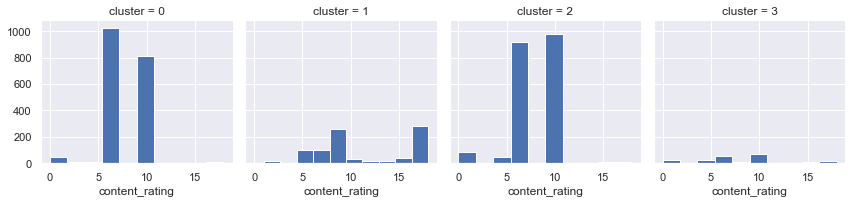

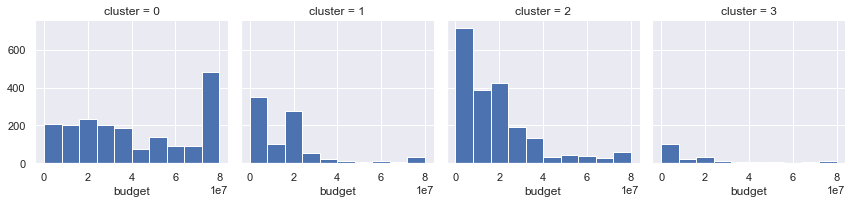

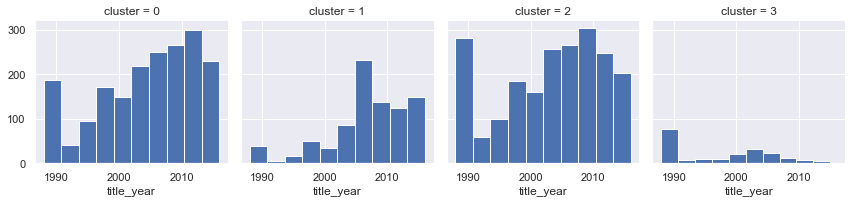

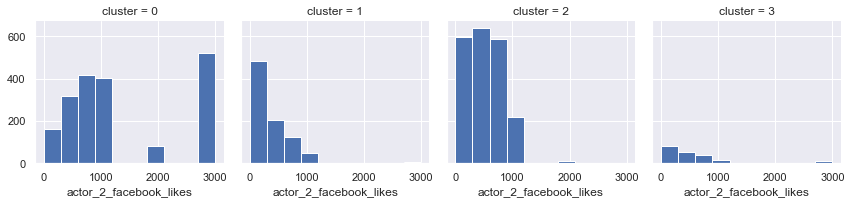

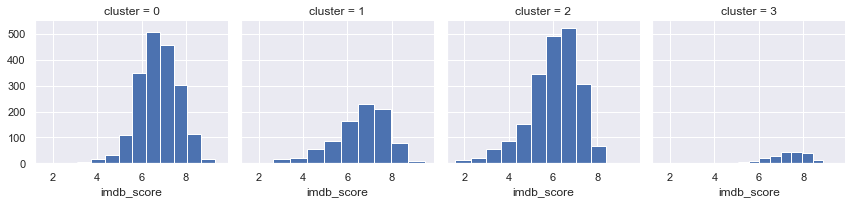

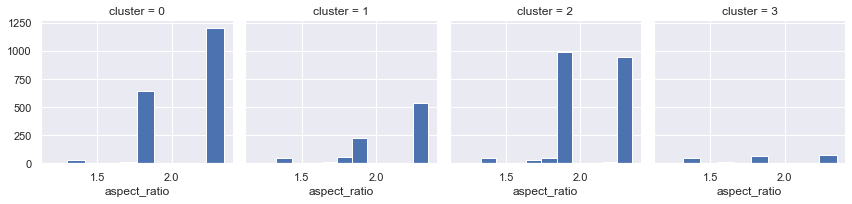

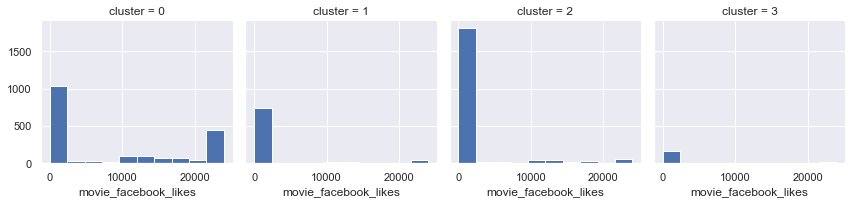

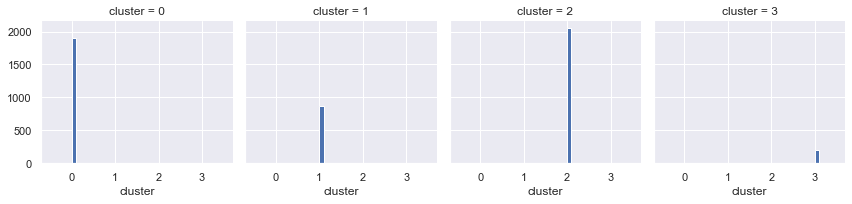

In [45]:
for c in clusters:
    grid= sns.FacetGrid(clusters, col='cluster')
    grid.map(plt.hist, c)

#### Cluster Highlights 

Cluster 0: Color Films. Longer Films. Popular cast. Popular lead actor. Popular movies. High Box Office. More Popular 

Cluster 1: Color Films. Low popularity cast. Recent Films. Low Box Office. Low Budget

Cluster 2: Color Films. Moderate Box Office Success. Less popular lead actor. Popular supporting cast. Low to moderate budget.

Cluster 3: Black and White Films, Older Films. Very Low Budget. Low popularity cast. Low Box Office Gross.

In [46]:
df['cluster'] = cluster

In [47]:
df

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,cluster
0,1,922,723.0,134.0,0.0,855.0,1405,1000.0,110476776.0,106,...,11,62,7,80000000.0,2009.0,936.0,7.9,1.78,24000,0
1,1,794,302.0,134.0,541.0,897.0,2216,18000.0,110476776.0,100,...,11,62,7,80000000.0,2007.0,3000.0,7.1,2.35,0,0
2,1,2021,602.0,134.0,0.0,161.0,2487,11000.0,110476776.0,127,...,11,61,7,80000000.0,2015.0,393.0,6.8,2.35,24000,0
3,1,373,813.0,134.0,541.0,897.0,532,18000.0,110476776.0,287,...,11,62,7,80000000.0,2012.0,3000.0,8.5,2.35,24000,0
4,2,600,110.0,103.0,131.0,371.5,2431,131.0,25517500.0,753,...,47,65,18,20000000.0,2005.0,12.0,7.1,2.35,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,1,2047,1.0,87.0,2.0,318.0,671,637.0,25517500.0,605,...,11,10,18,20000000.0,2013.0,470.0,7.7,2.35,84,2
5039,1,2394,43.0,43.0,49.0,319.0,2904,841.0,25517500.0,735,...,11,62,10,20000000.0,2005.0,593.0,7.5,2.35,24000,2
5040,1,186,13.0,76.0,0.0,0.0,1972,0.0,25517500.0,823,...,11,62,18,1400.0,2013.0,0.0,6.3,2.35,16,2
5041,1,453,14.0,100.0,0.0,489.0,649,946.0,10443.0,638,...,11,62,7,20000000.0,2012.0,719.0,6.3,2.35,660,1


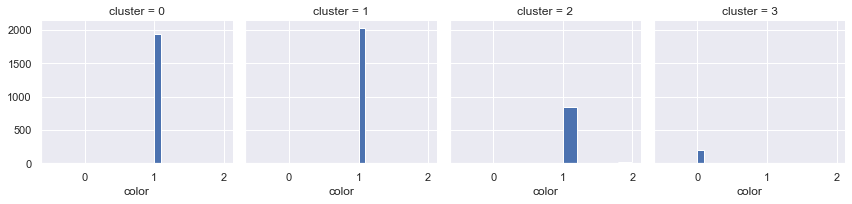

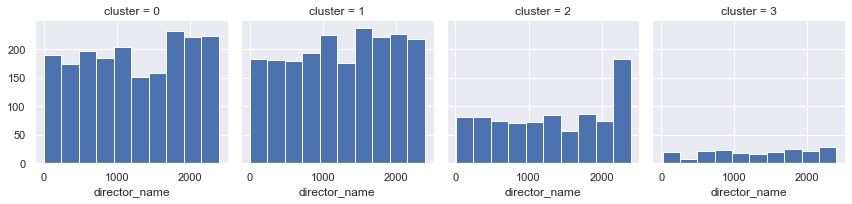

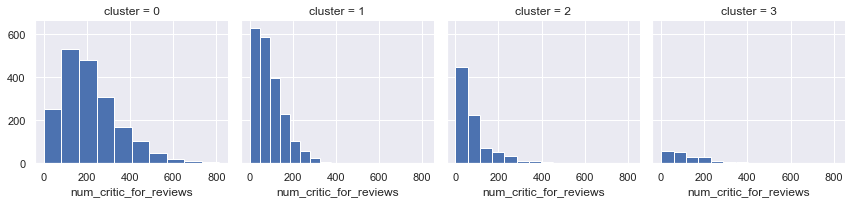

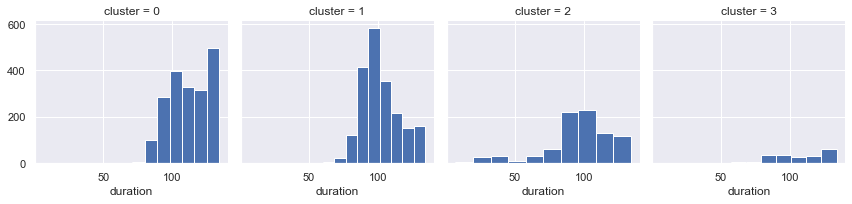

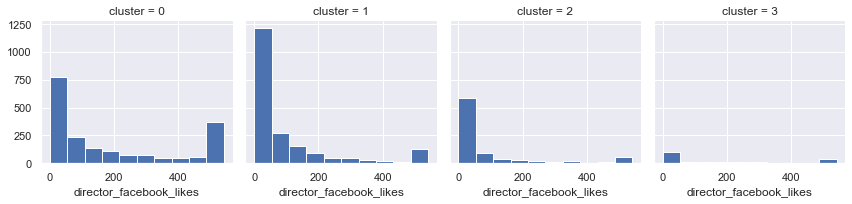

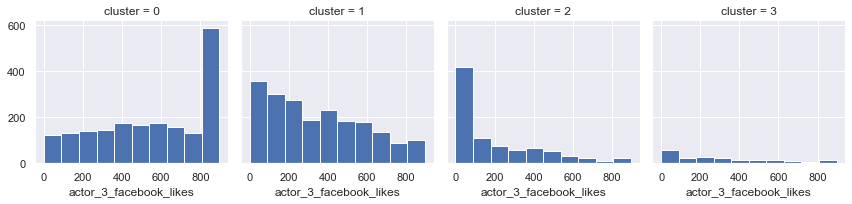

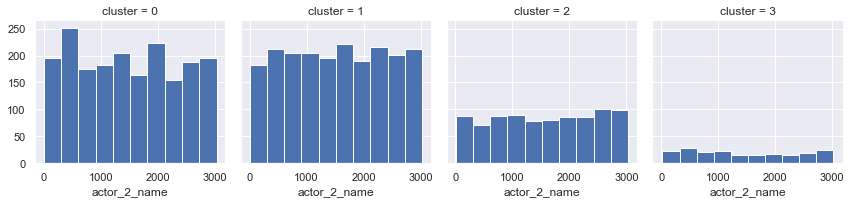

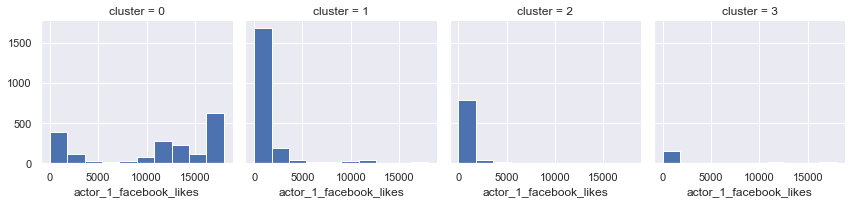

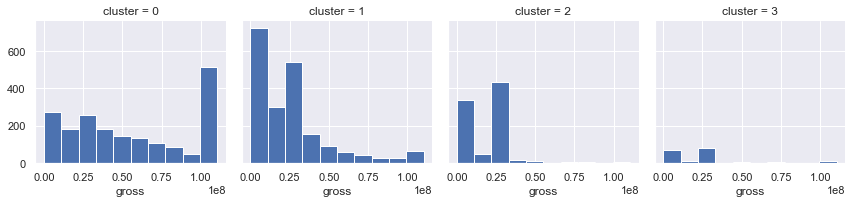

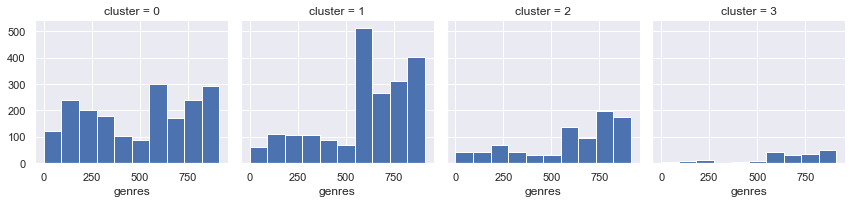

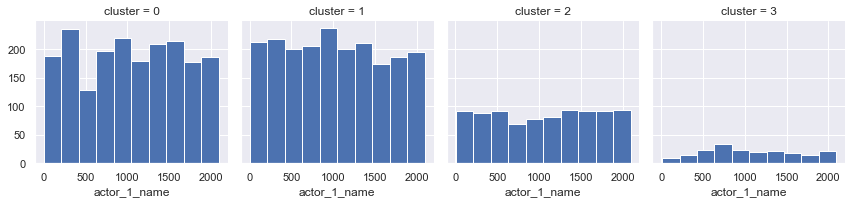

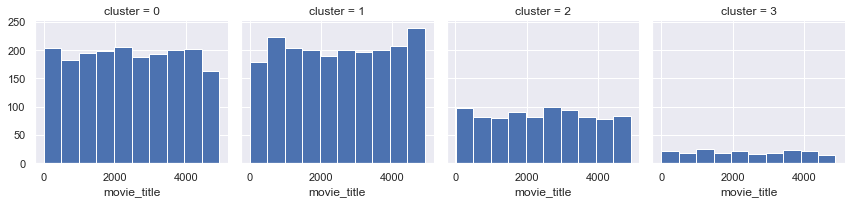

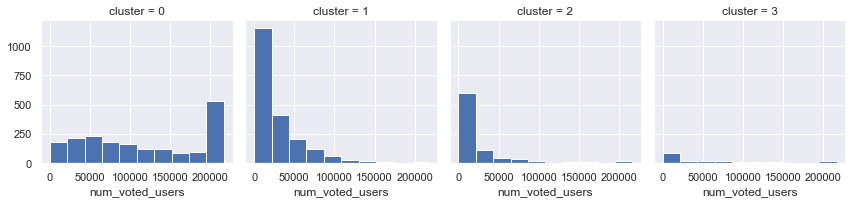

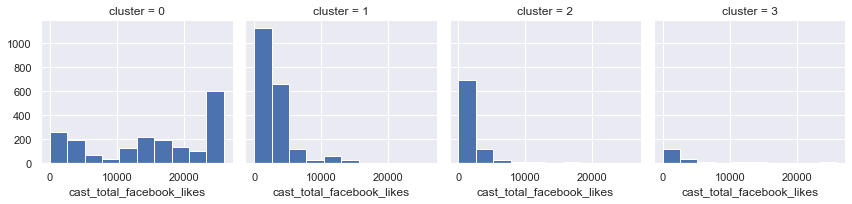

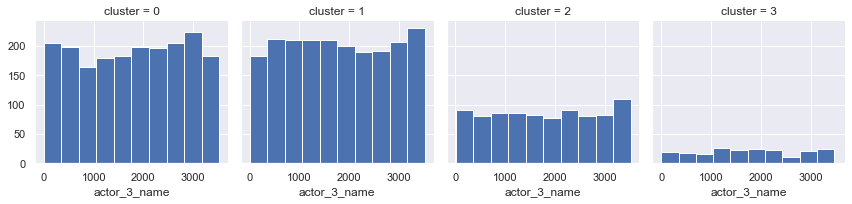

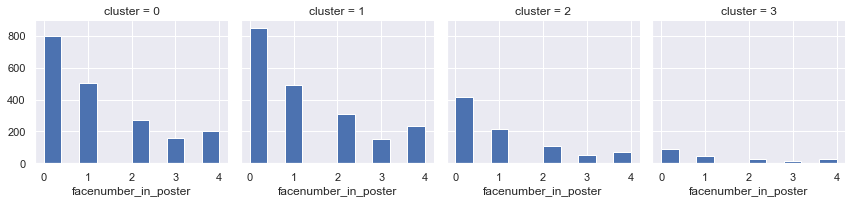

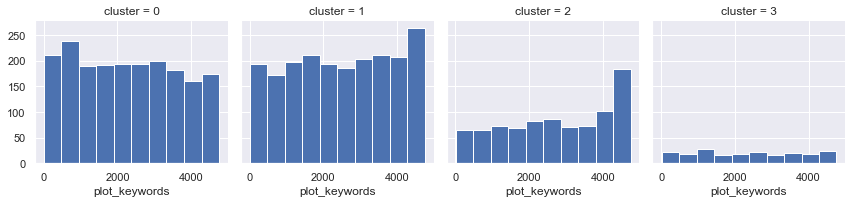

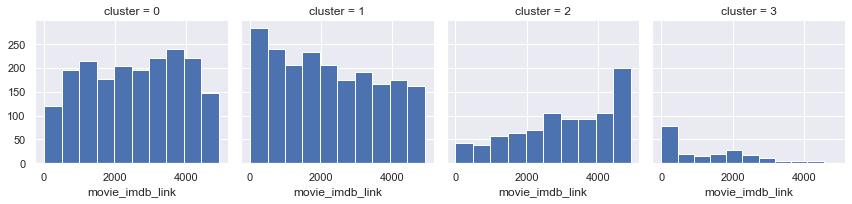

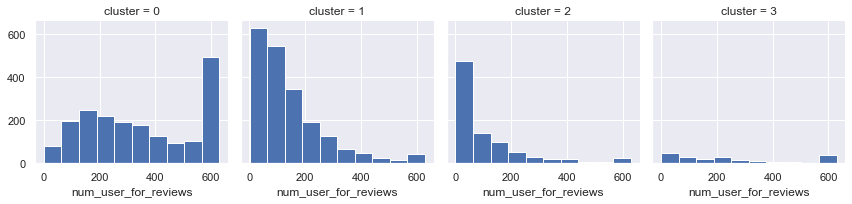

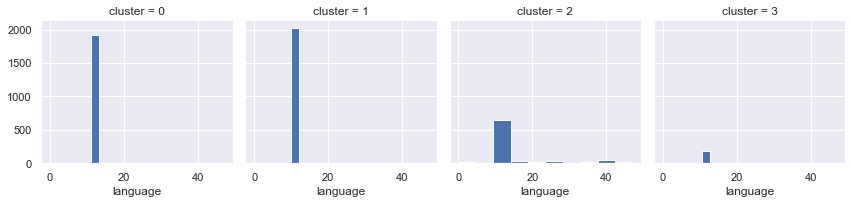

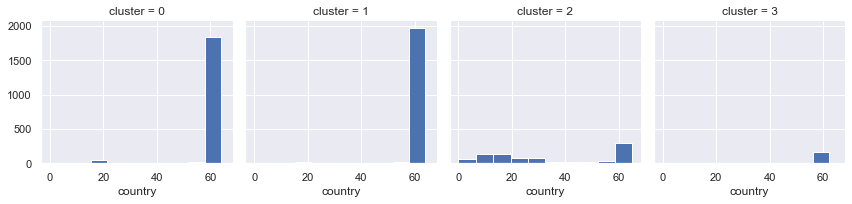

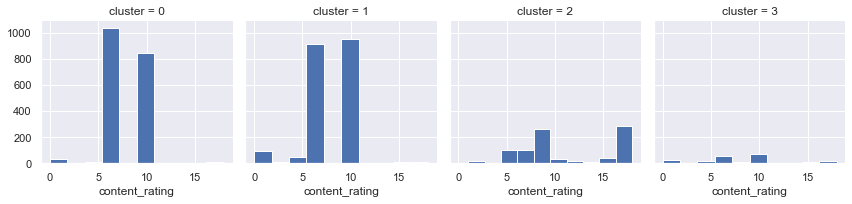

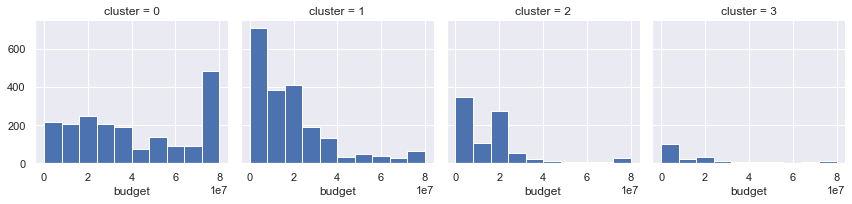

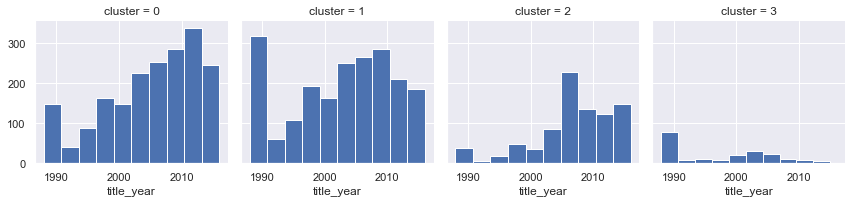

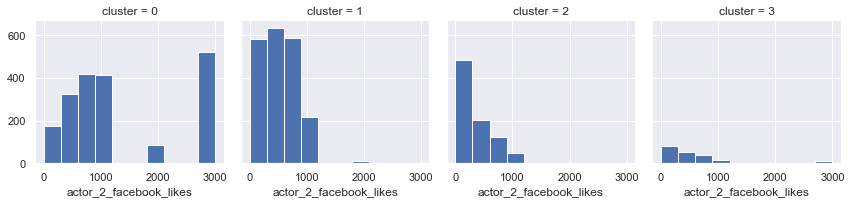

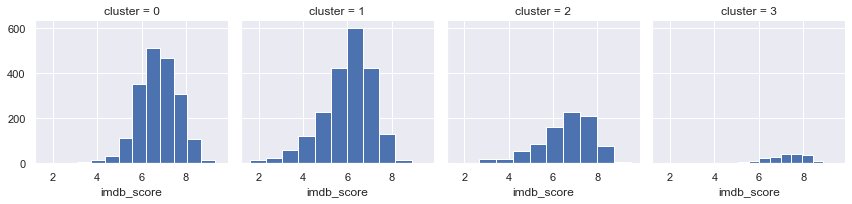

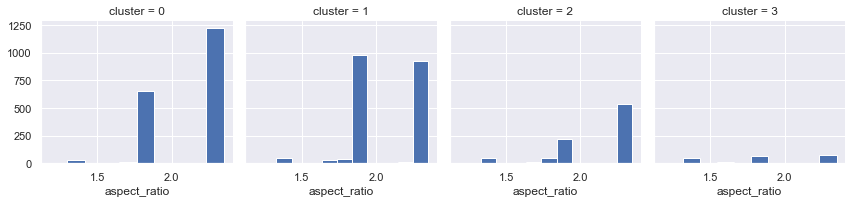

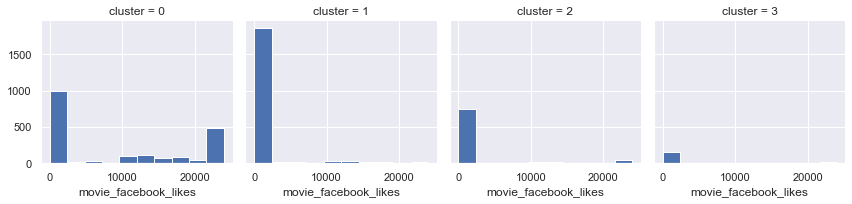

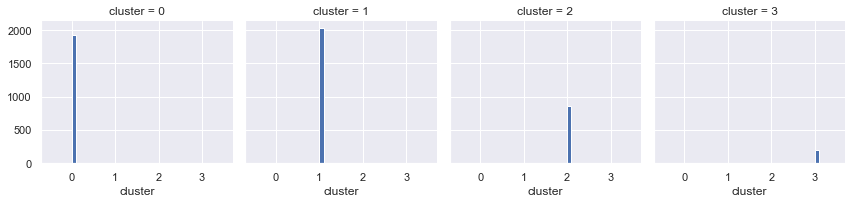

In [48]:
for column in df:
    grid= sns.FacetGrid(df, col='cluster')
    grid.map(plt.hist, column)

#### GMM Cluster Highlights

Cluster 0: Color Films. Longer Films. Popular cast. Popular lead actor. Popular movies. High Box Office. More Popular 

Cluster 1: Color Films. Moderate Box Office Success. Less popular lead actor. Popular supporting cast. Low to moderate budget.

Cluster 2: Color Films. Low popularity cast. Recent Films. Low Box Office. Low Budget. More language diversity.

Cluster 3: Black and White Films, Older Films. Very Low Budget. Low popularity cast. Low Box Office Gross.

## Conclusions

While the silhoutte scores for both models are close, I would choose the Kmeans model as the best model for this solution. The main reason why I would choose a Kmeans model despite the scores for both models being close is the hard clustering aspect of the Kmeans. 

I believe that for Netflix data a hard clustering approach is more useful. It allows for us to more definitively put the movies and tv shows in the catalog into distinct categories. By putting these movies and categories into such distinct categories, it allows for Netflix to provide better recommendations to an individual user by recommending movies that fit in the same cluster as shows or movies they have already watched. 

With that being said, I do believe there is a place for a soft clustering algorithm in the netflix process. Soft Cluster may be the better approach when new items are added to the catalog. By assigning a probability score based on attributes, a soft clustering would allows us to ensure that new items in the netflix catalog are placed in the cluster that returns the highest probability score based on its features.